In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Orignal Dataset Description

-> Below are the fields in the order that they appear in the records:

| Field                                 | Description                                                                                                                     |
|---------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
| Year                                  | Year                                                                                                                            |
| Quarter                               | Quarter (1-4)                                                                                                                   |
| Month                                 | Month                                                                                                                           |
| DayofMonth                            | Day of Month                                                                                                                    |
| DayOfWeek                             | Day of Week                                                                                                                     |
| FlightDate                            | Flight Date (yyyymmdd)                                                                                                          |
| Marketing_Airline_Network             | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |
| Operated_or_Branded_Code_Share_Partners | Reporting Carrier Operated or Branded Code Share Partners                                                                       |
| DOT_ID_Marketing_Airline              | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. |
| IATA_Code_Marketing_Airline           | Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code. |
| Flight_Number_Marketing_Airline       | Flight Number                                                                                                                   |
| Originally_Scheduled_Code_Share_Airline | Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |
| DOT_ID_Originally_Scheduled_Code_Share_Airline | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. |
| IATA_Code_Originally_Scheduled_Code_Share_Airline | Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code. |
| Flight_Num_Originally_Scheduled_Code_Share_Airline | Flight Number                                                                                                                   |
| Operating_Airline                     | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |
| DOT_ID_Operating_Airline              | An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. |
| IATA_Code_Operating_Airline           | Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code. |
| Tail_Number                           | Tail Number                                                                                                                     |
| Flight_Number_Operating_Airline       | Flight Number                                                                                                                   |
| OriginAirportID                       | Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused. |
| OriginAirportSeqID                    | Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time. |
| OriginCityMarketID                    | Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market. |
| Origin                                | Origin Airport                                                                                                                  |
| OriginCityName                        | Origin Airport, City Name                                                                                                       |
| OriginState                           | Origin Airport, State Code                                                                                                      |
| OriginStateFips                       | Origin Airport, State Fips                                                                                                      |
| OriginStateName                       | Origin Airport, State Name                                                                                                      |
| OriginWac                             | Origin Airport, World Area Code                                                                                                 |
| DestAirportID                         | Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused. |
| DestAirportSeqID                      | Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time. |
| DestCityMarketID                      | Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market. |
| Dest                                  | Destination Airport                                                                                                             |
| DestCityName                          | Destination Airport, City Name                                                                                                  |
| DestState                             | Destination Airport, State Code                                                                                                 |
| DestStateFips                         | Destination Airport, State Fips                                                                                                 |
| DestStateName                         | Destination Airport, State Name                                                                                                 |
| DestWac                               | Destination Airport, World Area Code                                                                                            |
| CRSDepTime                            | CRS Departure Time (local time: hhmm)                                                                                           |
| DepTime                               | Actual Departure Time (local time: hhmm)                                                                                        |
| DepDelay                              | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.                      |
| DepDelayMinutes                       | Difference in minutes between scheduled and actual departure time. Early departures set to 0.                                   |
| DepDel15                              | Departure Delay Indicator, 15 Minutes or More (1=Yes)                                                                           |
| DepartureDelayGroups                  | Departure Delay intervals, every (15 minutes from <-15 to >180)                                                                 |
| DepTimeBlk                            | CRS Departure Time Block, Hourly Intervals                                                                                      |
| TaxiOut                               | Taxi Out Time, in Minutes                                                                                                       |
| WheelsOff                             | Wheels Off Time (local time: hhmm)                                                                                              |
| WheelsOn                              | Wheels On Time (local time: hhmm)                                                                                               |
| TaxiIn                                | Taxi In Time, in Minutes                                                                                                        |
| CRSArrTime                            | CRS Arrival Time (local time: hhmm)                                                                                             |
| ArrTime                               | Actual Arrival Time (local time: hhmm)                                                                                          |
| ArrDelay                              | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.                          |
| ArrDelayMinutes                       | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.                                       |
| ArrDel15                              | Arrival Delay Indicator, 15 Minutes or More (1=Yes)                                                                             |
| ArrivalDelayGroups                    | Arrival Delay intervals, every (15-minutes from <-15 to >180)                                                                   |
| ArrTimeBlk                            | CRS Arrival Time Block, Hourly Intervals                                                                                        |
| Cancelled                             | Cancelled Flight Indicator (1=Yes)                                                                                              |
| CancellationCode                      | Specifies The Reason For Cancellation                                                                                           |
| Diverted                              | Diverted Flight Indicator (1=Yes)                                                                                               |
| CRSElapsedTime                        | CRS Elapsed Time of Flight, in Minutes                                                                                          |
| ActualElapsedTime                     | Elapsed Time of Flight, in Minutes                                                                                              |
| AirTime                               | Flight Time, in Minutes                                                                                                         |
| Flights                               | Number of Flights                                                                                                               |
| Distance                              | Distance between airports (miles)                                                                                               |
| DistanceGroup                         | Distance Intervals, every 250 Miles, for Flight Segment                                                                         |
| CarrierDelay                          | Carrier Delay, in Minutes                                                                                                       |
| WeatherDelay                          | Weather Delay, in Minutes                                                                                                       |
| NASDelay                              | National Air System Delay, in Minutes                                                                                           |
| SecurityDelay                         | Security Delay, in Minutes                                                                                                      |
| LateAircraftDelay                     | Late Aircraft Delay, in Minutes                                                                                                 |
| FirstDepTime                          | First Gate Departure Time at Origin Airport                                                                                     |
| TotalAddGTime                         | Total Ground Time Away from Gate for Gate Return or Cancelled Flight                                                            |
| LongestAddGTime                       | Longest Time Away from Gate for Gate Return or Cancelled Flight                                                                 |
| DivAirportLandings                    | Number of Diverted Airport Landings                                                                                             |
| DivReachedDest                        | Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)                                                                |
| DivActualElapsedTime                  | Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights. |
| DivArrDelay                           | Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights. |
| DivDistance                           | Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination. |
| Div1Airport                           | Diverted Airport Code1                                                                                                          |
| Div1AirportID                         | Airport ID of Diverted Airport 1. Airport ID is a Unique Key for an Airport                                                     |
| Div1AirportSeqID                      | Airport Sequence ID of Diverted Airport 1. Unique Key for Time Specific Information for an Airport                              |
| Div1WheelsOn                          | Wheels On Time (local time: hhmm) at Diverted Airport Code1                                                                     |
| Div1TotalGTime                        | Total Ground Time Away from Gate at Diverted Airport Code 1, in Minutes                                                         |
| Div1LongestGTime                      | Longest Ground Time Away from Gate at Diverted Airport Code 1, in Minutes                                                       |
| Div1WheelsOff                         | Wheels Off Time (local time: hhmm) at Diverted Airport Code1                                                                    |
| Div1TailNum                           | Tail Number used in flight segment between Diverted Airport 1 and Scheduled Destination                                         |
| Div2Airport                           | Diverted Airport Code 2                                                                                                          |
| Div2AirportID                         | Airport ID of Diverted Airport 2. Airport ID is a Unique Key for an Airport                                                     |
| Div2AirportSeqID                      | Airport Sequence ID of Diverted Airport 2. Unique Key for Time Specific Information for an Airport                              |
| Div2WheelsOn                          | Wheels On Time (local time: hhmm) at Diverted Airport Code2                                                                     |
| Div2TotalGTime                        | Total Ground Time Away from Gate at Diverted Airport Code 2, in Minutes                                                         |
| Div2LongestGTime                      | Longest Ground Time Away from Gate at Diverted Airport Code 2, in Minutes                                                       |
| Div2WheelsOff                         | Wheels Off Time (local time: hhmm) at Diverted Airport Code2                                                                    |
| Div2TailNum                           | Tail Number used in flight segment between Diverted Airport 2 and Scheduled Destination                                         |
| Div3Airport                           | Diverted Airport Code 3                                                                                                         |
| Div3AirportID                         | Airport ID of Diverted Airport 3. Airport ID is a Unique Key for an Airport                                                     |
| Div3AirportSeqID                      | Airport Sequence ID of Diverted Airport 3. Unique Key for Time Specific Information for an Airport                              |
| Div3WheelsOn                          | Wheels On Time (local time: hhmm) at Diverted Airport Code3                                                                     |
| Div3TotalGTime                        | Total Ground Time Away from Gate at Diverted Airport Code 3, in Minutes                                                         |
| Div3LongestGTime                      | Longest Ground Time Away from Gate at Diverted Airport Code 3, in Minutes                                                       |
| Div3WheelsOff                         | Wheels Off Time (local time: hhmm) at Diverted Airport Code3                                                                    |
| Div3TailNum                           | Tail Number used in flight segment between Diverted Airport 3 and Scheduled Destination                                         |
| Div4Airport                           | Diverted Airport Code 4                                                                                                         |
| Div4AirportID                         | Airport ID of Diverted Airport 4. Airport ID is a Unique Key for an Airport                                                     |
| Div4AirportSeqID                      | Airport Sequence ID of Diverted Airport 4. Unique Key for Time Specific Information for an Airport                              |
| Div4WheelsOn                          | Wheels On Time (local time: hhmm) at Diverted Airport Code4                                                                     |
| Div4TotalGTime                        | Total Ground Time Away from Gate at Diverted Airport Code 4, in Minutes                                                         |
| Div4LongestGTime                      | Longest Ground Time Away from Gate at Diverted Airport Code 4, in Minutes                                                       |
| Div4WheelsOff                         | Wheels Off Time (local time: hhmm) at Diverted Airport Code4                                                                    |
| Div4TailNum                           | Tail Number used in flight segment between Diverted Airport 4 and Scheduled Destination                                         |
| Div5Airport                           | Diverted Airport Code 5                                                                                                         |
| Div5AirportID                         | Airport ID of Diverted Airport 5. Airport ID is a Unique Key for an Airport                                                     |
| Div5AirportSeqID                      | Airport Sequence ID of Diverted Airport 5. Unique Key for Time Specific Information for an Airport                              |
| Div5WheelsOn                          | Wheels On Time (local time: hhmm) at Diverted Airport Code5                                                                     |
| Div5TotalGTime                        | Total Ground Time Away from Gate at Diverted Airport Code 5, in Minutes                                                         |
| Div5LongestGTime                      | Longest Ground Time Away from Gate at Diverted Airport Code 5, in Minutes                                                       |
| Div5WheelsOff                         | Wheels Off Time (local time: hhmm) at Diverted Airport Code5                                                                    |
| Div5TailNum                           | Tail Number used in flight segment between Diverted Airport 5 and Scheduled Destination                                         |
| Duplicate                           | Duplicate flag marked "Y" if the flight is swapped based on Form-3A data                                         |

# Data Collection & Column Filtering

In [ ]:
import pandas as pd
import os

# Define the directory containing the CSV files
directory = '/kaggle/input/us-flight-delay-dataset-2023-2024/US Flight Delay Dataset 2023-2024 (Aug)'

# List of required columns to select
columns_to_select = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
    'Tail_Number', 'Origin', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'CRSElapsedTime',
    'ActualElapsedTime', 'AirTime', 'Distance', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
    'Diverted', 'Cancelled', 'CancellationCode', 'NASDelay', 'SecurityDelay', 'CarrierDelay', 'LateAircraftDelay',
    'WeatherDelay'
]

# Create an empty list to store individual DataFrames
dataframes = []

# Loop through each subdirectory in the specified directory
for subdir, _, files in os.walk(directory):
    for file in files:
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            # Read only the specified columns from the CSV file and append it to the list
            df = pd.read_csv(file_path, usecols=columns_to_select)
            dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Optionally, save the combined DataFrame to a new CSV file
combined_df.to_csv('/kaggle/working/combined_flight_delay_data.csv', index=False)

# Organizing & Cleaning Data

## Loading Dataset

In [1]:
import pandas as pd

# Load the combined CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/combined-flight-delay-dataset-2023-24/combined_flight_delay_data.csv')

In [2]:
# Display the first few rows of the DataFrame
df.head()

,Year,Month,DayofMonth,DayOfWeek,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Tail_Number,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2023,12,30,6,DL,4800.0,N919XJ,IND,LGA,1124,...,0.0,124.0,125.0,109.0,660.0,NaN,NaN,NaN,NaN,NaN
1,2023,12,30,6,DL,4800.0,N919XJ,LGA,IND,808,...,0.0,150.0,110.0,89.0,660.0,NaN,NaN,NaN,NaN,NaN
2,2023,12,1,5,DL,4800.0,N184GJ,LGA,STL,1846,...,0.0,180.0,175.0,144.0,888.0,NaN,NaN,NaN,NaN,NaN
3,2023,12,3,7,DL,4800.0,N146PQ,LGA,STL,1846,...,0.0,180.0,201.0,155.0,888.0,0.0,0.0,21.0,0.0,23.0
4,2023,12,4,1,DL,4800.0,N695CA,LGA,STL,1846,...,0.0,180.0,187.0,141.0,888.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Print basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12301234 entries, 0 to 12301233
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   IATA_Code_Marketing_Airline      object 
 5   Flight_Number_Marketing_Airline  float64
 6   Tail_Number                      object 
 7   Origin                           object 
 8   Dest                             object 
 9   CRSDepTime                       int64  
 10  DepTime                          float64
 11  DepDelay                         float64
 12  TaxiOut                          float64
 13  WheelsOff                        float64
 14  WheelsOn                         float64
 15  TaxiIn                           float64
 16  CRSArrTime                       int64  
 17  ArrTim

In [4]:
# Define a mapping for cancellation codes to their abbreviations
cancellation_code_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Replace cancellation codes in the DataFrame
df['CancellationCode'] = df['CancellationCode'].replace(cancellation_code_mapping)

## Storing abbreviation

In [5]:
import pandas as pd

# Define the paths to the CSV files
airport_file_path = '/kaggle/input/combined-flight-delay-dataset-2023-24/Flight-Airport abbreviation/L_AIRPORT.csv'
cancellation_file_path = '/kaggle/input/combined-flight-delay-dataset-2023-24/Flight-Airport abbreviation/L_CANCELLATION.csv'
airplane_file_path = '/kaggle/input/combined-flight-delay-dataset-2023-24/Flight-Airport abbreviation/L_CARRIER_HISTORY.csv'


# Read the CSV files into DataFrames
df_airport = pd.read_csv(airport_file_path)
df_cancellation = pd.read_csv(cancellation_file_path)
df_airplane = pd.read_csv(airplane_file_path)
# Load the LONG-LAT.csv file
long_lat_df = pd.read_csv('/kaggle/input/combined-flight-delay-dataset-2023-24/Flight-Airport abbreviation/LONG-LAT.csv')

# Print the DataFrames
print("DataFrame for Airports:")
print(df_airport.head(), "\n")  # Print the first few rows

print("DataFrame for Cancellations:")
print(df_cancellation.head(), "\n")  # Print the first few rows

print("DataFrame for Airplanes:")
print(df_airplane.head())  # Print the first few rows

DataFrame for Airports:
  Code                                    Description
0  01A         Afognak Lake, AK: Afognak Lake Airport
1  03A  Granite Mountain, AK: Bear Creek Mining Strip
2  04A                       Lik, AK: Lik Mining Camp
3  05A         Little Squaw, AK: Little Squaw Airport
4  06A                     Kizhuyak, AK: Kizhuyak Bay 

DataFrame for Cancellations:
  Code          Description
0    A              Carrier
1    B              Weather
2    C  National Air System
3    D             Security 

DataFrame for Airplanes:
  Code                              Description
0  02Q                  Titan Airways (2006 - )
1  04Q             Tradewind Aviation (2006 - )
2  05Q        Comlux Aviation, AG (2006 - 2012)
3  06Q  Master Top Linhas Aereas Ltd. (2007 - )
4  07Q            Flair Airlines Ltd. (2007 - )


In [6]:
# Count the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)

Year                                  2
Month                                12
DayofMonth                           31
DayOfWeek                             7
IATA_Code_Marketing_Airline          10
Flight_Number_Marketing_Airline    6903
Tail_Number                        6578
Origin                              359
Dest                                359
CRSDepTime                         1391
DepTime                            1440
DepDelay                           2055
TaxiOut                             196
WheelsOff                          1440
WheelsOn                           1440
TaxiIn                              236
CRSArrTime                         1438
ArrTime                            1440
ArrDelay                           2075
Cancelled                             2
CancellationCode                      4
Diverted                              2
CRSElapsedTime                      635
ActualElapsedTime                   732
AirTime                             690


In [7]:
# List of "Other" columns
other_columns = [
    'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline', 'Tail_Number', 'Origin', 'Dest',
    'Cancelled', 'CancellationCode', 'Diverted', 'Distance'
]

# Print unique values and counts for each column
for column in other_columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Unique values in column '{column}' ({unique_count}):\n{unique_values}\n")

Unique values in column 'Year' (2):
[2023 2024]

Unique values in column 'Month' (12):
[12  2  7  5  3  8  6  1 11  4  9 10]

Unique values in column 'DayofMonth' (31):
[30  1  3  4  5  6  7  8 10 11 12 13 14 15 16 23 18 19 20 21 22  2  9 24
 17 25 31 26 27 28 29]

Unique values in column 'DayOfWeek' (7):
[6 5 7 1 2 3 4]

Unique values in column 'IATA_Code_Marketing_Airline' (10):
['DL' 'AA' 'AS' 'B6' 'UA' 'WN' 'F9' 'G4' 'HA' 'NK']

Unique values in column 'Flight_Number_Marketing_Airline' (6904):
[4800. 4803. 4804. ... 6405. 6416. 9675.]

Unique values in column 'Tail_Number' (6579):
['N919XJ' 'N184GJ' 'N146PQ' ... 'N626AE' 'NZ52AW' 'N933AE']

Unique values in column 'Origin' (359):
['IND' 'LGA' 'CVG' 'ATL' 'BUF' 'TUL' 'TYS' 'RIC' 'JFK' 'ORF' 'MCI' 'RDU'
 'ROC' 'DSM' 'MEM' 'STL' 'CHA' 'MSP' 'HPN' 'BTR' 'CMH' 'DTW' 'IAD' 'PWM'
 'LEX' 'JAX' 'CHS' 'FAR' 'ORH' 'BGR' 'PVD' 'ITH' 'AEX' 'CLT' 'FAY' 'DAY'
 'CLE' 'DCA' 'MSN' 'AGS' 'BNA' 'PNS' 'MYR' 'MGM' 'OMA' 'GRR' 'CRW' 'CAE'
 'DLH' 'TLH' 'A

In [8]:
# List of airline codes to check
airline_codes_to_check = ['DL', 'AA', 'AS', 'B6', 'UA', 'WN', 'F9', 'G4', 'HA', 'NK']
# List of airport codes to check
airport_codes_to_check = ['IND', 'LGA', 'CVG', 'ATL', 'BUF', 'TUL', 'TYS', 'RIC', 'JFK', 'ORF', 'MCI', 'RDU',
                           'ROC', 'DSM', 'MEM', 'STL', 'CHA', 'MSP', 'HPN', 'BTR', 'CMH', 'DTW', 'IAD', 'PWM',
                           'LEX', 'JAX', 'CHS', 'FAR', 'ORH', 'BGR', 'PVD', 'ITH', 'AEX', 'CLT', 'FAY', 'DAY',
                           'CLE', 'DCA', 'MSN', 'AGS', 'BNA', 'PNS', 'MYR', 'MGM', 'OMA', 'GRR', 'CRW', 'CAE',
                           'DLH', 'TLH', 'ATW', 'SAV', 'ALB', 'EWR', 'LAN', 'SYR', 'CHO', 'MIA', 'LIT', 'PIT',
                           'BTV', 'BDL', 'PHL', 'DHN', 'EYW', 'GSO', 'BHM', 'GTR', 'TVC', 'ILM', 'BMI', 'MOB',
                           'MLU', 'RST', 'MLI', 'OAJ', 'MKE', 'XNA', 'MDT', 'SDF', 'MQT', 'AUS', 'ICT', 'CWA',
                           'JAN', 'ROA', 'TRI', 'LFT', 'BWI', 'SHV', 'GSP', 'FSD', 'ABE', 'GFK', 'GRB', 'VLD',
                           'AVL', 'SGF', 'ORD', 'HSV', 'FLL', 'CID', 'AZO', 'BGM', 'GNV', 'GPT', 'BOS', 'MSY',
                           'RSW', 'SBN', 'LAX', 'HNL', 'LAS', 'ABQ', 'DFW', 'SFO', 'PHX', 'KOA', 'AVP', 'SAT',
                           'OGG', 'DAB', 'DEN', 'SAN', 'EGE', 'PBI', 'PDX', 'SJU', 'IAH', 'MCO', 'ONT', 'LIH',
                           'STT', 'TPA', 'SEA', 'SMF', 'LBB', 'JAC', 'SRQ', 'AMA', 'GEG', 'SNA', 'BZN', 'SLC',
                           'PSP', 'FAT', 'EUG', 'RNO', 'TUS', 'OKC', 'ECP', 'ELP', 'VPS', 'MFE', 'BUR', 'SBA',
                           'BFL', 'SBP', 'SJC', 'COS', 'BOI', 'ANC', 'GUC', 'HDN', 'MRY', 'MTJ', 'STX', 'MSO',
                           'EWN', 'ERI', 'HTS', 'ART', 'PGV', 'SCE', 'FWA', 'MHT', 'LYH', 'PHF', 'EVV', 'FLO',
                           'SBY', 'MHK', 'FNT', 'SPI', 'COU', 'LSE', 'PIA', 'ALO', 'LRD', 'LAW', 'BPT', 'BET',
                           'BRW', 'SCC', 'JNU', 'KTN', 'YAK', 'CDV', 'SIT', 'PSG', 'WRG', 'ADQ', 'FAI', 'OME',
                           'OTZ', 'DAL', 'PAE', 'RDM', 'PSC', 'STS', 'OAK', 'ADK', 'YKM', 'PUW', 'IDA', 'MFR',
                           'BIL', 'FCA', 'EAT', 'DLG', 'AKN', 'SUN', 'GTF', 'RDD', 'BQN', 'PSE', 'GRK', 'LCH',
                           'YUM', 'ASE', 'GGG', 'CPR', 'EKO', 'ABY', 'INL', 'IMT', 'SWO', 'TYR', 'BQK', 'GRI',
                           'MOT', 'RAP', 'XWA', 'ALW', 'TWF', 'BIS', 'PIH', 'GJT', 'ACV', 'HLN', 'LWS', 'MAF',
                           'LGB', 'JLN', 'SPS', 'ABR', 'BJI', 'CAK', 'MBS', 'RHI', 'SLN', 'DDC', 'DRO', 'MDW',
                           'SAF', 'CIU', 'HIB', 'BRD', 'CMX', 'GCK', 'BTM', 'CSG', 'ESC', 'ROW', 'TXK', 'SGU',
                           'FLG', 'FSM', 'CDC', 'ACT', 'OTH', 'HOU', 'CLL', 'CRP', 'CNY', 'SUX', 'BLI', 'ELM',
                           'FOD', 'DVL', 'HYS', 'JST', 'LNK', 'BIH', 'DEC', 'VCT', 'APN', 'PLN', 'SJT', 'MEI',
                           'PIB', 'LAR', 'BFF', 'VEL', 'HRL', 'RKS', 'JMS', 'RIW', 'SHR', 'DIK', 'CYS', 'PRC',
                           'LBL', 'MCW', 'GCC', 'LBF', 'GUM', 'SPN', 'HOB', 'PQI', 'COD', 'BRO', 'ISP', 'ITO',
                           'MLB', 'TTN', 'PVU', 'RFD', 'SFB', 'AZA', 'SCK', 'LCK', 'PGD', 'PIE', 'TOL', 'BLV',
                           'SWF', 'HGR', 'USA', 'CKB', 'SMX', 'PSM', 'PBG', 'IAG', 'STC', 'PPG', 'ABI', 'HHH',
                           'CMI', 'ACY', 'LBE', 'OWB', 'DRT', 'GST', 'ACK', 'MVY', 'HYA', 'WYS', 'PUB']

# Check if the codes are in the df_airplane DataFrame
airline_codes = df_airplane[df_airplane['Code'].isin(airline_codes_to_check)]

# Check if the codes are in the df_airport DataFrame and store the result
airport_codes = df_airport[df_airport['Code'].isin(airport_codes_to_check)]

# Display the results
print("Present airline codes in airline_codes:")
print(airline_codes)
print("\n")

# Step 1: Drop duplicates based on the AIRPORT column
long_lat_cleaned = long_lat_df.drop_duplicates(subset=['AIRPORT'])

# Step 2: Merge airport codes with long_lat_cleaned
# Assuming 'Code' in df_airport and 'AIRPORT' in long_lat_cleaned
merged_df = pd.merge(airport_codes, long_lat_cleaned[['AIRPORT', 'LONGITUDE', 'LATITUDE']], 
                     left_on='Code', right_on='AIRPORT', how='inner')

# Step 3: Drop the AIRPORT column from the merged DataFrame
merged_df.drop(columns=['AIRPORT'], inplace=True)

airport_codes = merged_df
# Display the results
print("Present airport codes in airport_codes:")
print(airport_codes)

Present airline codes in airline_codes:
     Code                       Description
226    AA  American Airlines Inc. (1960 - )
370    AS    Alaska Airlines Inc. (1960 - )
420    B6         JetBlue Airways (2000 - )
644    DL    Delta Air Lines Inc. (1960 - )
743    F9  Frontier Airlines Inc. (1994 - )
796    G4           Allegiant Air (2000 - )
872    HA  Hawaiian Airlines Inc. (1960 - )
1253   NK        Spirit Air Lines (1992 - )
1746   UA   United Air Lines Inc. (1960 - )
1865   WN  Southwest Airlines Co. (1979 - )


Present airport codes in airport_codes:
    Code                                        Description   LONGITUDE  \
0    ABE  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...  -75.440556   
1    ABI                      Abilene, TX: Abilene Regional  -99.679722   
2    ABQ  Albuquerque, NM: Albuquerque International Sun... -106.608333   
3    ABR                    Aberdeen, SD: Aberdeen Regional  -98.422500   
4    ABY             Albany, GA: Southwest Georgia Regional

## Data Cleaning

### DateTIme

In [9]:
import numpy as np
import pandas as pd
import datetime

def convert_to_time(time_value):
    """Convert time in HHMM format to a datetime.time object."""
    if pd.isnull(time_value):
        return np.nan  # Return NaN if the value is null
    else:
        # Handle special case for midnight (24:00 -> 00:00)
        if time_value == 2400:
            time_value = 0

        # Format time_value as a 4-digit string (e.g., 0830 -> "0830")
        time_str = "{:04d}".format(int(time_value))

        # Extract hours and minutes from the formatted string
        hours, minutes = int(time_str[0:2]), int(time_str[2:4])

        # Convert to datetime.time object
        formatted_time = datetime.time(hours, minutes)
    return formatted_time

# Apply conv_time to each specified time column in df
time_columns = ['CRSDepTime', 'DepTime', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrTime']
for col in time_columns:
    df[col] = df[col].apply(convert_to_time)
df[time_columns].head()

,CRSDepTime,DepTime,WheelsOff,WheelsOn,CRSArrTime,ArrTime
0,11:24:00,11:19:00,11:29:00,13:18:00,13:28:00,13:24:00
1,08:08:00,07:59:00,08:13:00,09:42:00,10:38:00,09:49:00
2,18:46:00,18:36:00,19:01:00,20:25:00,20:46:00,20:31:00
3,18:46:00,19:09:00,19:47:00,21:22:00,20:46:00,21:30:00
4,18:46:00,18:39:00,19:17:00,20:38:00,20:46:00,20:46:00


### Missing Percentage + Imputation

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of missing values in each column:")
print(missing_percentage.sort_values())

Percentage of missing values in each column:
Year                                0.000000
CRSArrTime                          0.000000
Distance                            0.000000
Diverted                            0.000000
Dest                                0.000000
Origin                              0.000000
CRSDepTime                          0.000000
IATA_Code_Marketing_Airline         0.000000
DayOfWeek                           0.000000
DayofMonth                          0.000000
Month                               0.000000
Cancelled                           0.000000
Flight_Number_Marketing_Airline     0.000008
CRSElapsedTime                      0.000049
Tail_Number                         0.322789
DepTime                             1.400502
DepDelay                            1.403054
TaxiOut                             1.448668
WheelsOff                           1.448668
ArrTime                             1.482347
TaxiIn                              1.482372
WheelsOn  

## Reconstruction of Missing Data

Our null analysis reveals that the following features have a significant proportion of missing values:

- **SecurityDelay:** 78.91%
- **CarrierDelay:** 78.91%
- **WeatherDelay:** 78.91%
- **NASDelay:** 78.91%
- **LateAircraftDelay:** 78.91%

In this context, we aim to reconstruct the missing data based on a logical assessment of the situation. The substantial absence of values in these features suggests that the airlines likely did not incur delays attributed to these specific factors. 

It is important to note that the missing data is not indicative of poor data quality; rather, it reflects instances where no actions associated with these delay features occurred. This can be substantiated by examining records where at least one delay feature is triggered: in such cases, all other delay-related features are initialized to **0.0**.

Thus, it is appropriate to transform the NaN values in these features to **0.0**, as this indicates no impact on the flight delays from these particular factors.


In [11]:
df.loc[df['CarrierDelay'].notnull(), ['SecurityDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']].head()

,SecurityDelay,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
3,0.0,0.0,0.0,21.0,23.0
10,0.0,1.0,0.0,0.0,114.0
57,0.0,0.0,0.0,11.0,52.0
60,0.0,0.0,0.0,18.0,0.0
68,0.0,0.0,0.0,0.0,58.0


In [12]:
df[['SecurityDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']] = df[['SecurityDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']].fillna(0)

considering the small number of categorical values, I will handle the missing values in the **CancellationCode** column (98.54% missing) by converting them manually to represent meaningful categories. The final transformation will be as follows:

- **NaN** → `0` (No cancellation)
- **'Carrier'** → `1` (Cancellation by Carrier)
- **'Weather'** → `2` (Cancellation due to Weather)
- **'National Air System'** → `3` (Cancellation due to National Air System)
- **'Security'** → `4` (Cancellation due to Security)

This approach ensures that missing values are represented by `0`, indicating no cancellation, while other categories are mapped to unique integers for consistency and clarity in analysis.


In [13]:
# Define the mapping dictionary
cancellation_mapping = {
    'Carrier': 1,
    'Weather': 2,
    'National Air System': 3,
    'Security': 4
}

# Apply the mapping and fill NaN values with 0
df['CancellationCode'] = df['CancellationCode'].map(cancellation_mapping).fillna(0)

### Null Values in Different Types of Time Values

In our dataset, we have both measured and calculated time values. While we possess the formulas necessary to compute these times, it's important to note that the underlying values used in these calculations are also affected by NaN (Not a Number) data. This likely contributes to the initial NaN entries in the time values. 

Given that this NaN data constitutes only about 1% of the total dataset, we can categorize it as outliers. Consequently, we have the option to remove these outlier entries, as their impact on our analysis is minimal.

In [14]:
df = df.dropna(axis=0)  # Drop rows with any NaN values

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of missing values in each column:")
print(missing_percentage.sort_values())

Percentage of missing values in each column:
Year                               0.0
NASDelay                           0.0
WeatherDelay                       0.0
CarrierDelay                       0.0
Distance                           0.0
AirTime                            0.0
ActualElapsedTime                  0.0
CRSElapsedTime                     0.0
Diverted                           0.0
CancellationCode                   0.0
Cancelled                          0.0
ArrDelay                           0.0
ArrTime                            0.0
CRSArrTime                         0.0
SecurityDelay                      0.0
TaxiIn                             0.0
WheelsOff                          0.0
TaxiOut                            0.0
DepDelay                           0.0
DepTime                            0.0
CRSDepTime                         0.0
Dest                               0.0
Origin                             0.0
Tail_Number                        0.0
Flight_Number_Marke

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12089512 entries, 0 to 12301233
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Month                            int64  
 2   DayofMonth                       int64  
 3   DayOfWeek                        int64  
 4   IATA_Code_Marketing_Airline      object 
 5   Flight_Number_Marketing_Airline  float64
 6   Tail_Number                      object 
 7   Origin                           object 
 8   Dest                             object 
 9   CRSDepTime                       object 
 10  DepTime                          object 
 11  DepDelay                         float64
 12  TaxiOut                          float64
 13  WheelsOff                        object 
 14  WheelsOn                         object 
 15  TaxiIn                           float64
 16  CRSArrTime                       object 
 17  ArrTime    

# Exploratory Data Analysis (EDA)

## General Stats



In [32]:
# List of columns to get descriptive statistics
columns_of_interest = [
    'ArrDelay',
    'Cancelled',
    'CancellationCode',
    'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Distance',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'TaxiIn',
    'DepDelay',
    'TaxiOut'
]
# Get descriptive statistics for the specified columns
df[columns_of_interest].describe()

,ArrDelay,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TaxiIn,DepDelay,TaxiOut
count,1.208951e+07,12089512.0,12089512.0,12089512.0,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07,1.208951e+07
mean,7.891580e+00,0.0,0.0,0.0,1.433592e+02,1.380520e+02,1.121171e+02,8.084936e+02,5.365121e+00,8.896258e-01,2.822663e+00,2.931094e-02,6.301957e+00,8.198208e+00,1.319794e+01,1.773676e+01
std,5.958423e+01,0.0,0.0,0.0,7.203634e+01,7.197515e+01,7.000608e+01,5.931869e+02,3.715970e+01,1.570753e+01,1.580168e+01,1.615184e+00,3.248102e+01,6.693047e+00,5.749893e+01,9.618822e+00
min,-1.190000e+02,0.0,0.0,0.0,-5.000000e+00,1.500000e+01,5.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.900000e+01,1.000000e+00
25%,-1.500000e+01,0.0,0.0,0.0,9.000000e+01,8.600000e+01,6.100000e+01,3.730000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,-6.000000e+00,1.200000e+01
50%,-6.000000e+00,0.0,0.0,0.0,1.250000e+02,1.210000e+02,9.400000e+01,6.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,-2.000000e+00,1.500000e+01
75%,1.000000e+01,0.0,0.0,0.0,1.740000e+02,1.690000e+02,1.420000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,2.000000e+01
max,5.780000e+03,0.0,0.0,0.0,1.162000e+03,1.354000e+03,1.338000e+03,5.095000e+03,5.764000e+03,2.419000e+03,2.700000e+03,1.460000e+03,3.581000e+03,4.440000e+02,5.764000e+03,2.690000e+02


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



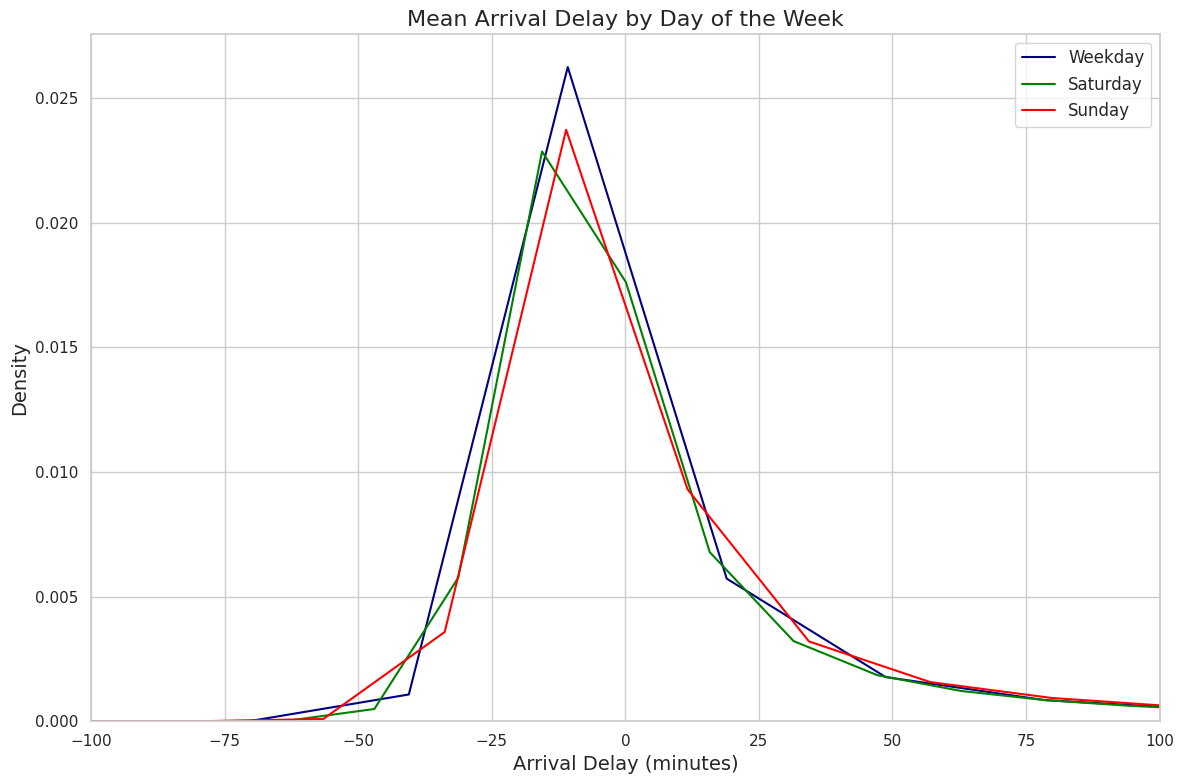

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 8))

# Plotting the kernel density estimation for each category with adjusted bandwidth
sns.kdeplot(df[df['DayOfWeek'] < 6]['ArrDelay'], label='Weekday', color='navy', bw_adjust=1.5)
sns.kdeplot(df[df['DayOfWeek'] == 6]['ArrDelay'], label='Saturday', color='green', bw_adjust=1.5)
sns.kdeplot(df[df['DayOfWeek'] == 7]['ArrDelay'], label='Sunday', color='red', bw_adjust=1.5)

# Adding labels and title
plt.title('Mean Arrival Delay by Day of the Week', fontsize=16)
plt.xlabel('Arrival Delay (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)

# Set x-axis limits to zoom in
plt.xlim(-100, 100)

# Show the plot
plt.tight_layout()
plt.show()


The density plot of mean arrival delays shows that flights are generally more punctual on weekdays compared to weekends, with a sharper peak near zero delay, indicating consistent on-time performance. Weekday flights also have a higher density of early arrivals, suggesting that they are more likely to arrive ahead of schedule. In contrast, Saturday and Sunday show broader peaks and slightly lower densities near zero, indicating greater variability in arrival times and a smaller tendency for early arrivals.

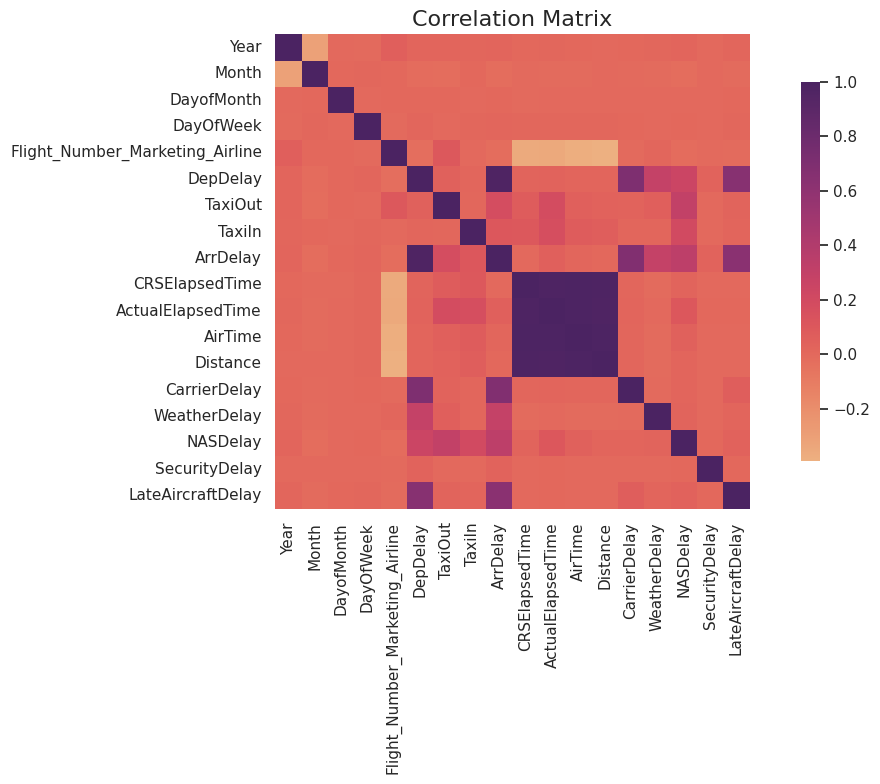

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Select only numeric columns from the DataFrame and exclude specific columns
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Cancelled', 'CancellationCode', 'Diverted'], errors='ignore')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the heatmap without annotations
sns.heatmap(corr_matrix, cmap='flare', annot=False, square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### Results from Correlation Matrix

I have categorized the correlations into two parts: strong positive correlations (higher than 0.6) and moderate positive correlations (between 0.2 and 0.6). Below are the findings based on these criteria:

**Strong Positive Correlations ( > 0.6):**
- **DepDelay** and:
  - **ArrDelay**
  - **LateAircraftDelay**
  - **CarrierDelay**
  
- **ArrDelay** and:
  - **DepDelay**
  - **LateAircraftDelay**
  - **CarrierDelay**

**Moderate Positive Correlations (0.2 - 0.6):**
- **ArrDelay** and:
  - **NASDelay**
  - **WeatherDelay**

- **DepDelay** and:
  - **NASDelay**
  - **WeatherDelay**

- **TaxiOut** and:
  - **NASDelay**
  - **ActualElapsedTime**

These correlations suggest that delays in one part of a flight process, such as departure, are often associated with delays in other areas, like arrival. Additionally, factors such as **NASDelay** and **WeatherDelay** moderately impact both departure and arrival delays, indicating the influence of broader air traffic and weather conditions. **TaxiOut** and **ActualElapsedTime** are also moderately correlated, suggesting that longer taxi times could contribute to longer flight durations.


## Airline Analysis

#### Number of Flights per Airline

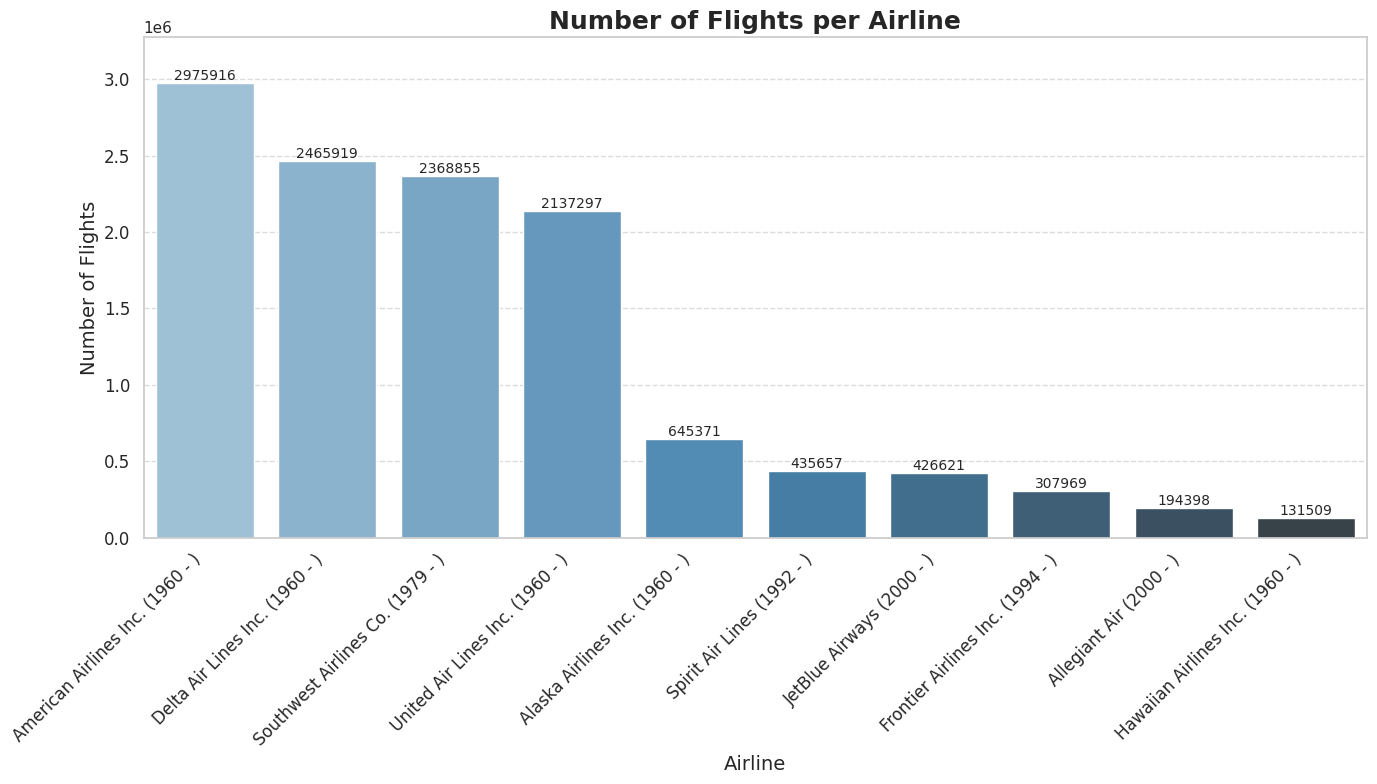

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the DataFrame with airline codes to get full airline names
flights_per_airline = df.merge(airline_codes, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

# Count the number of flights per airline
flight_counts = flights_per_airline['Description'].value_counts()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=flight_counts.index, y=flight_counts.values, palette="Blues_d")

# Titles and labels
plt.title('Number of Flights per Airline', fontsize=18, fontweight='bold')
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding counts on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 200,  # Adjust the y-position for better visibility
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set limits for y-axis
plt.ylim(0, flight_counts.max() * 1.1)  # Slightly higher than the max value for better spacing

# Display the plot with tight layout
plt.tight_layout()
plt.show()

del flights_per_airline
del flight_counts 

## Overall Observations:

- **American Airlines** is the leading airline in terms of the number of flights, with over 3 million flights during the period.
- **Delta Air Lines** and **Southwest Airlines** follow closely behind American Airlines, with approximately 2.5 million flights each.
- **United Air Lines** and **Alaska Airlines** also have a significant number of flights, exceeding 2 million.
- **Spirit Air Lines**, **JetBlue Airways**, **Frontier Airlines**, **Allegiant Air**, and **Hawaiian Airlines** have fewer flights compared to the top five airlines.

## Key Findings:

- **Dominance of Major Airlines**: The top five airlines (American Airlines, Delta Air Lines, Southwest Airlines, United Air Lines, and Alaska Airlines) collectively account for a major portion of the total flights, indicating their significant market share.
- **Regional Variation**: Some airlines, such as Spirit Air Lines and Frontier Airlines, may focus on specific regions or routes, leading to a lower number of flights compared to the larger airlines.
- **Growth Potential**: Smaller airlines like Hawaiian Airlines and Allegiant Air have room for growth, as they currently have fewer flights compared to their larger counterparts.


#### Analyzing the Delays by Airline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


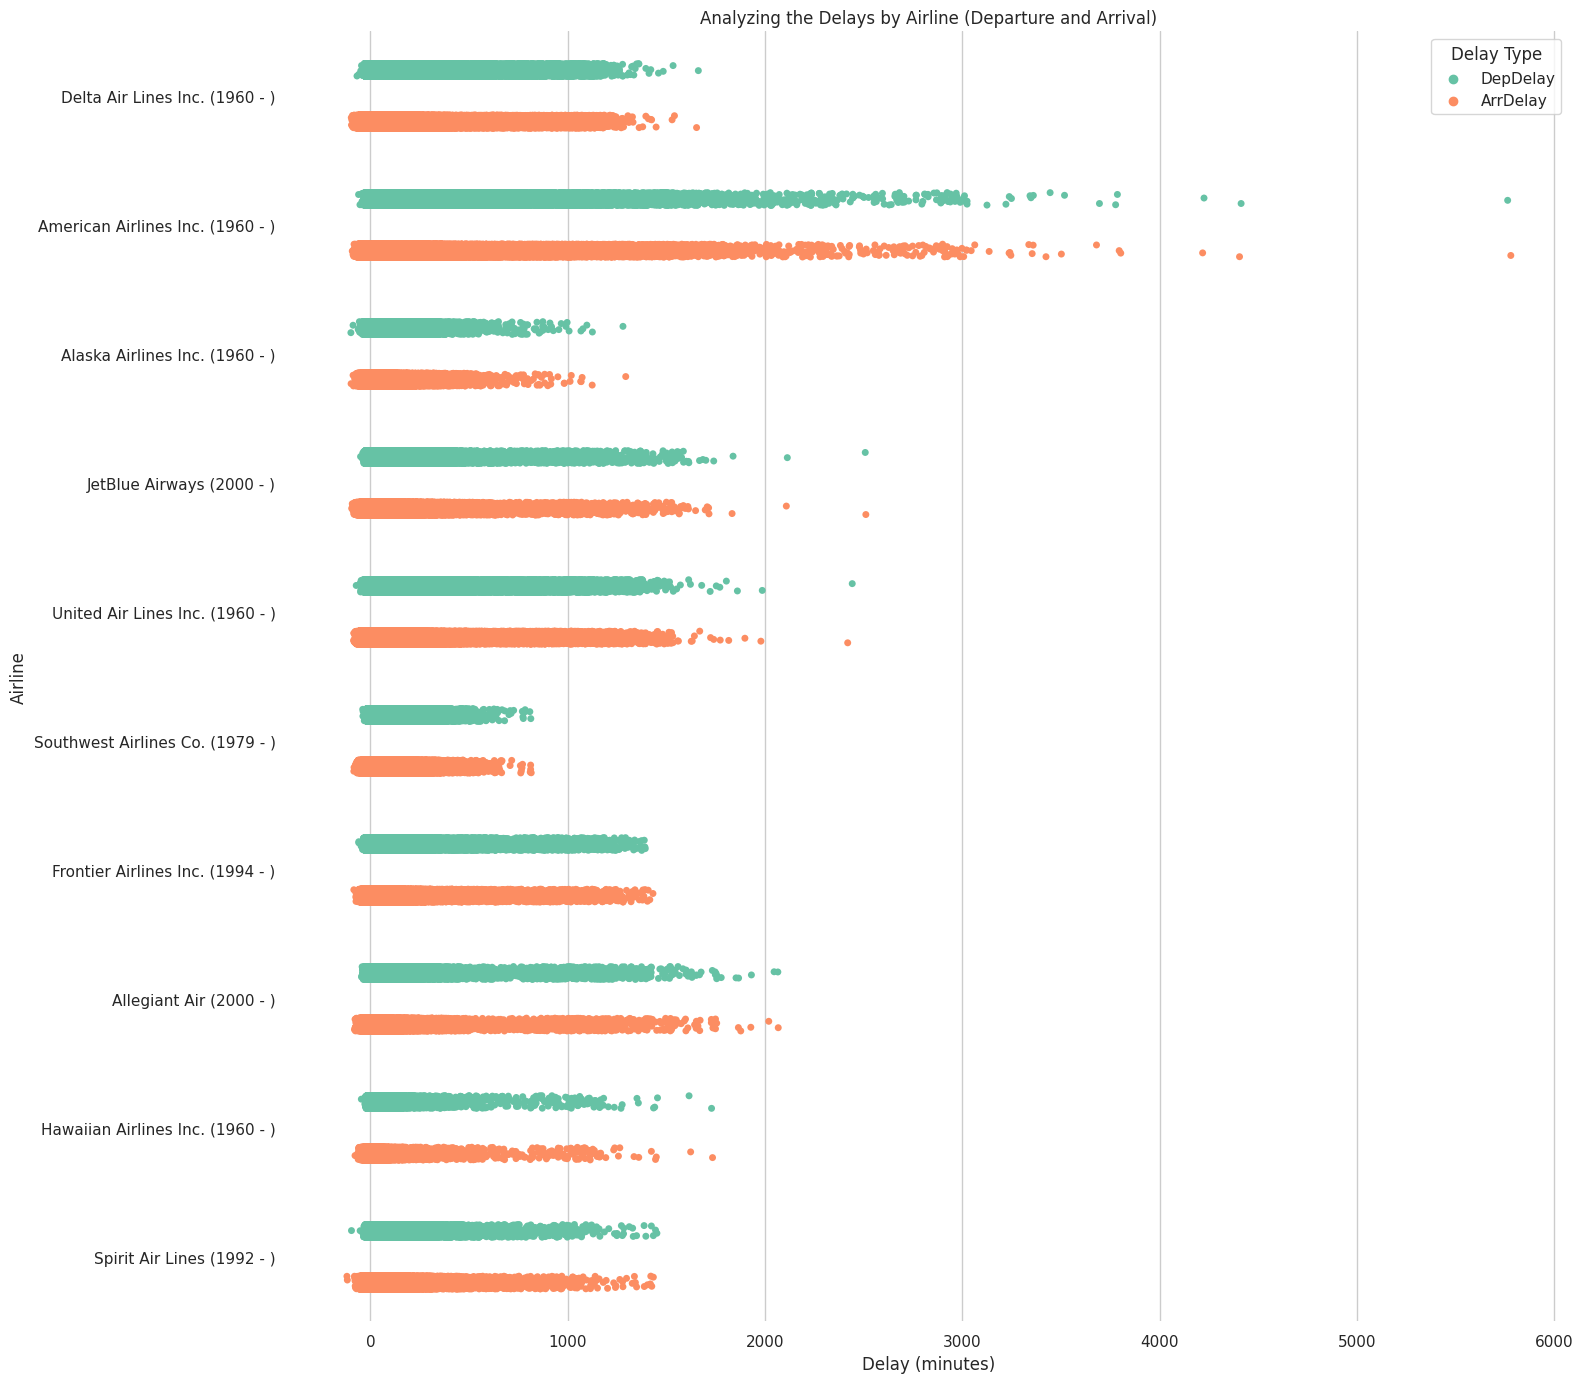

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Merging df with airline_codes to get full airline names
df_with_airlines = df.merge(airline_codes, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

# Reshape the DataFrame to long format for both delays
df_long = df_with_airlines.melt(id_vars=['Description'], 
                                 value_vars=['DepDelay', 'ArrDelay'], 
                                 var_name='Delay_Type', 
                                 value_name='Delay_Value')

# Initialize the figure
fig_dim = (16, 14)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot using a color palette
sns.stripplot(x="Delay_Value", y="Description", hue="Delay_Type", 
               data=df_long, dodge=True, jitter=True, palette="Set2")

# Adding title and labels
plt.title('Analyzing the Delays by Airline (Departure and Arrival)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Airline')

# Customize legend
plt.legend(title='Delay Type')

# Show plot
plt.tight_layout()
plt.show()

# Clean up variables
del df_with_airlines, df_long

This strip plot illustrates the distribution of departure and arrival delays across various airlines in 2023 and 2024. Each airline shows both departure (green) and arrival delays (orange), with most delays clustered below 1,000 minutes, though some outliers reach up to nearly 6,000 minutes. Major airlines like Delta, American, and United exhibit a wide range of delays, but most points are tightly packed, suggesting frequent delays within a manageable timeframe and occasional extreme cases. In contrast, airlines with fewer flights, such as Hawaiian and Allegiant, also show delays but with fewer extreme outliers, possibly due to smaller route networks or better schedule control. Consistency in delay distribution between departure and arrival suggests that delays in departure often propagate to arrival, impacting overall punctuality for all airlines

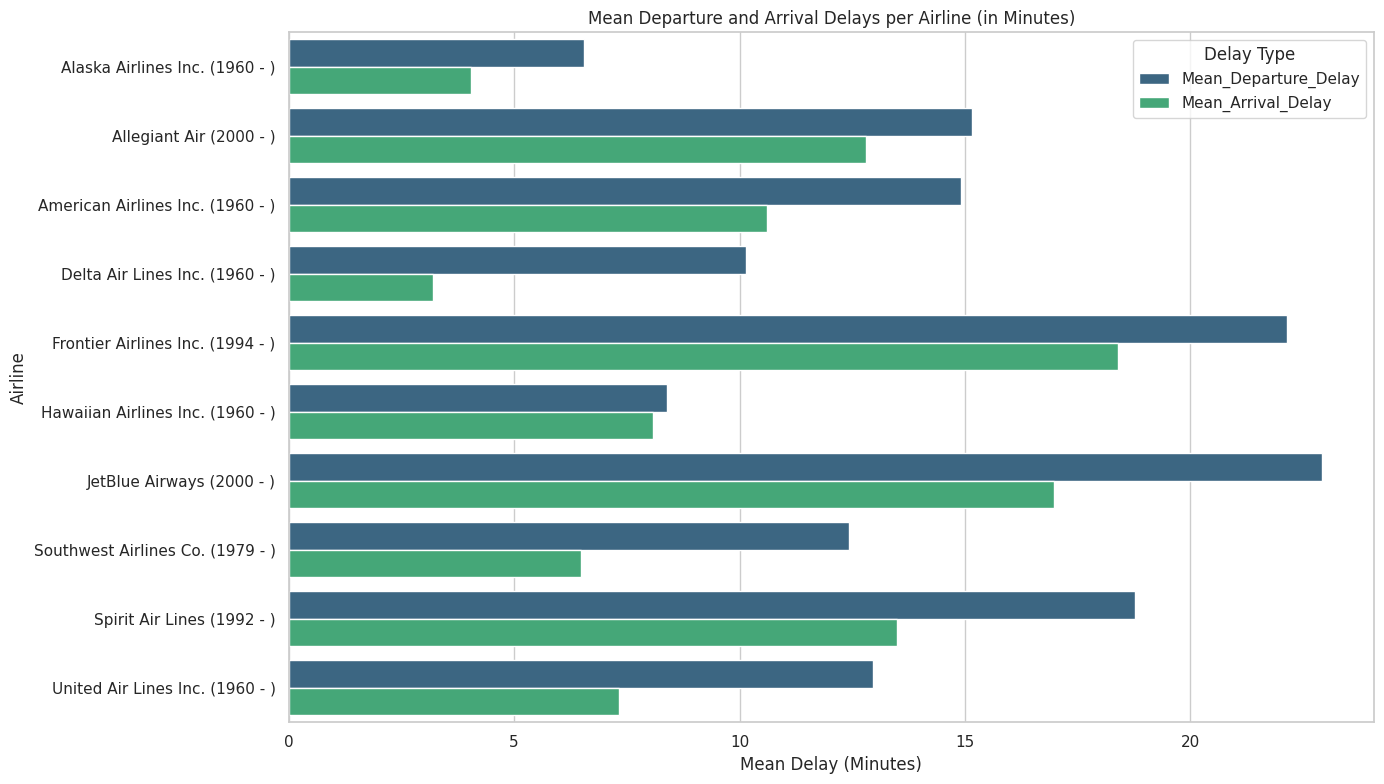

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merging df with airline_codes to get full airline names
df_with_airlines = df.merge(airline_codes, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

# Calculate the mean departure and arrival delays per airline in minutes
mean_delays = df_with_airlines.groupby('Description').agg(
    Mean_Departure_Delay=('DepDelay', 'mean'),
    Mean_Arrival_Delay=('ArrDelay', 'mean')
).reset_index()

# Melt the DataFrame for easier plotting
mean_delays_melted = mean_delays.melt(id_vars='Description', 
                                       value_vars=['Mean_Departure_Delay', 'Mean_Arrival_Delay'],
                                       var_name='Delay_Type', 
                                       value_name='Delay_Minutes')

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Delay_Minutes', y='Description', hue='Delay_Type', data=mean_delays_melted, palette='viridis')

# Adding titles and labels
plt.title('Mean Departure and Arrival Delays per Airline (in Minutes)')
plt.xlabel('Mean Delay (Minutes)')
plt.ylabel('Airline')

# Show plot
plt.tight_layout()
plt.legend(title='Delay Type')
plt.show()

# Clean up variables
del df_with_airlines, mean_delays, mean_delays_melted


This bar chart shows the mean departure and arrival delays across various airlines in 2023 and 2024. Frontier Airlines has the highest mean departure delay, exceeding 20 minutes, while Allegiant and JetBlue also experience substantial departure delays, around 15–20 minutes on average. For arrival delays, Allegiant, Frontier, and JetBlue exhibit similar trends, with high mean values that reflect substantial delay propagation from departure to arrival. Notably, the arrival delay is consistently lower than the departure delay for each airline, indicating that airlines work to make up for lost time during flights to reduce the impact of departure delays and aim for timely arrivals. Delta Air Lines stands out with a relatively low mean arrival delay despite a notable mean departure delay, which may be attributed to factors like aircraft maintenance or crew scheduling issues. This suggests that Delta effectively manages in-flight recovery to ensure on-time arrivals. 

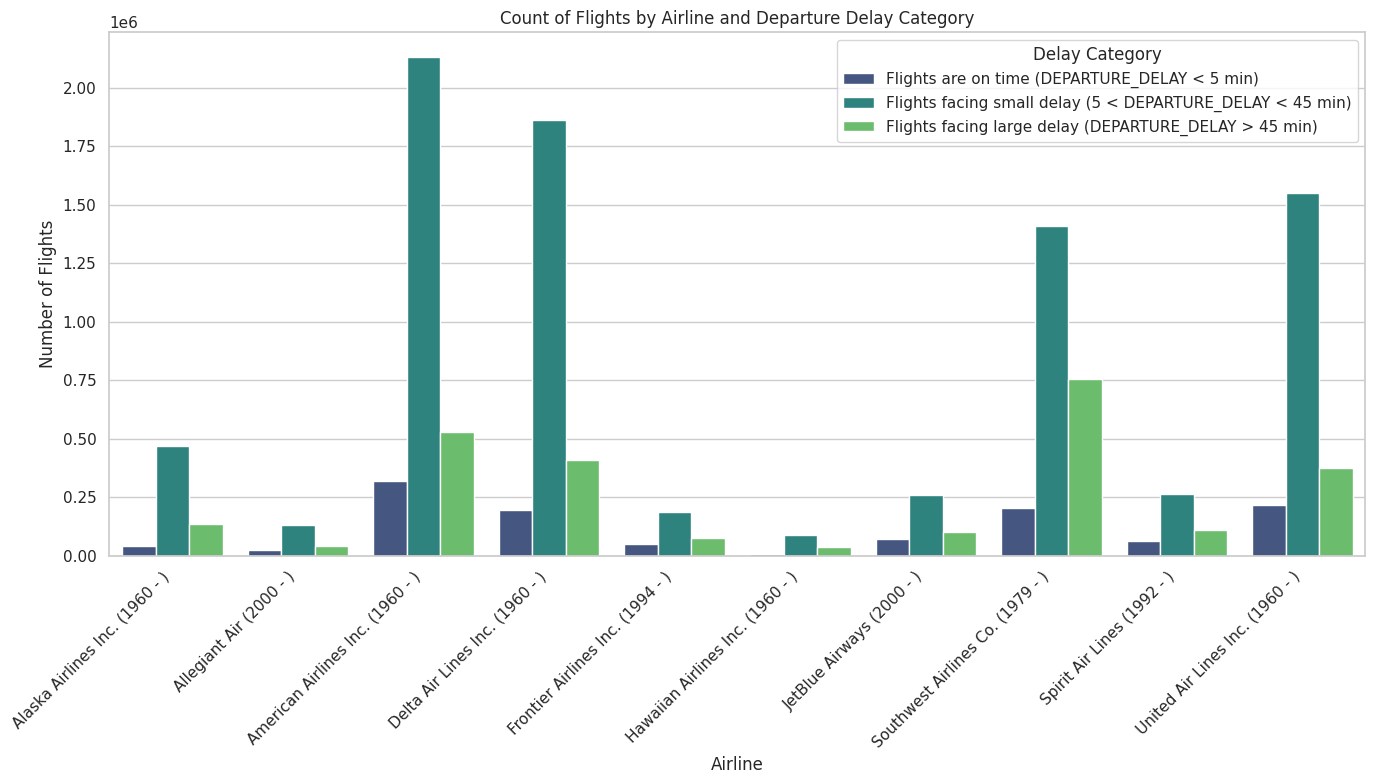

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define delay categories
conditions = [
    (df['DepDelay'] < 5),
    (df['DepDelay'] >= 5) & (df['DepDelay'] <= 45),
    (df['DepDelay'] > 45)
]
choices = ['On Time', 'Small Delay', 'Large Delay']
df['Delay_Category'] = np.select(conditions, choices, default='Unknown')

# Merging df with airline_codes to get full airline names
df_with_airlines = df.merge(airline_codes, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

# Count the number of flights in each delay category per airline
flight_counts = df_with_airlines.groupby(['Description', 'Delay_Category']).size().reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Description', y='Count', hue='Delay_Category', data=flight_counts, palette='viridis')

# Customize legends
legends = plt.legend(title='Delay Category', loc='upper right')
legends.get_texts()[0].set_text('Flights are on time (DEPARTURE_DELAY < 5 min)')
legends.get_texts()[1].set_text('Flights facing small delay (5 < DEPARTURE_DELAY < 45 min)')
legends.get_texts()[2].set_text('Flights facing large delay (DEPARTURE_DELAY > 45 min)')

# Adding titles and labels
plt.title('Count of Flights by Airline and Departure Delay Category')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Clean up variables
del df_with_airlines, flight_counts

#### Average Speed of Airlines

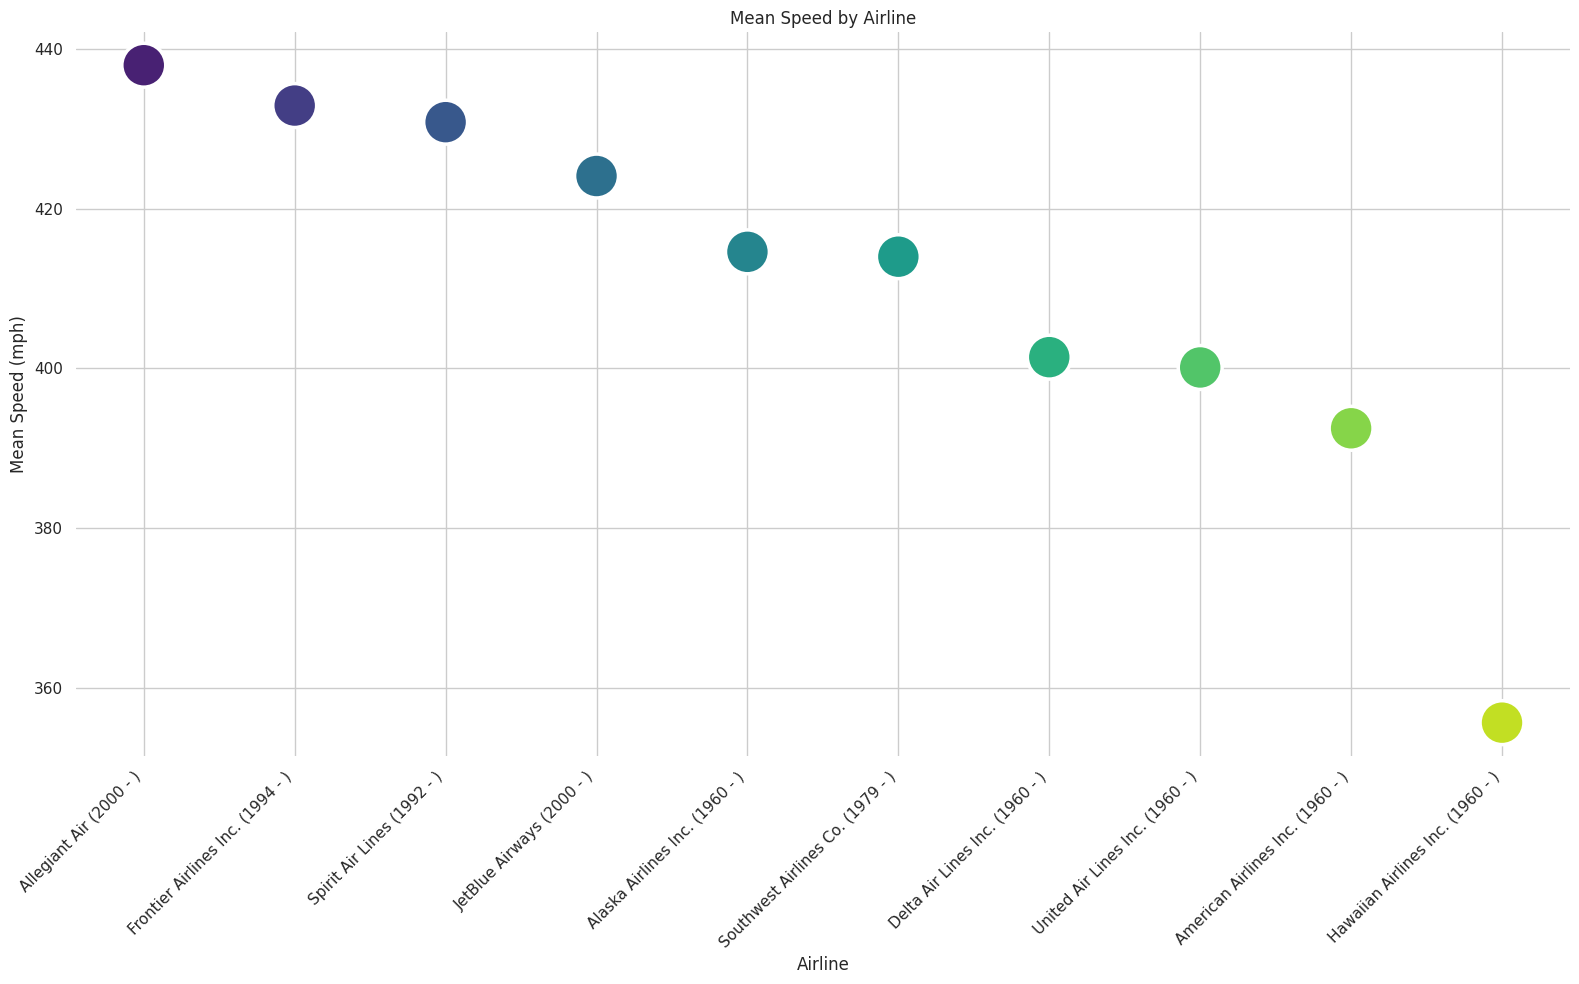

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Merging df with airline_codes to get full airline names
df_with_airlines = df.merge(airline_codes, left_on='IATA_Code_Marketing_Airline', right_on='Code', how='left')

# Calculate speed (miles per hour)
df_with_airlines['Speed'] = (df_with_airlines['Distance'] / df_with_airlines['AirTime']) * 60

# Group by airline and calculate mean speed
mean_speed_by_airline = df_with_airlines.groupby('Description')['Speed'].mean().reset_index()

# Sort the DataFrame by Speed
mean_speed_by_airline_sorted = mean_speed_by_airline.sort_values(by='Speed', ascending=False)

# Initialize the figure
fig_dim = (16, 10)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Create a scatter plot with larger circles and hue
sns.scatterplot(x='Description', y='Speed', data=mean_speed_by_airline_sorted, 
                s=1000,  # increased size of the circles
                hue='Description',  # hue based on airline names
                palette='viridis',  # change the palette for better visualization
                legend=None)  # hide the legend if it's too cluttered

# Adding title and labels
plt.title('Mean Speed by Airline')
plt.xlabel('Airline')
plt.ylabel('Mean Speed (mph)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Clean up variables
del df_with_airlines, mean_speed_by_airline, mean_speed_by_airline_sorted


American Airlines and Hawaiian Airlines have the lowest average speeds, while Allegiant Air has the highest.

## Airport Analysis

#### Top 10 Origin Airports by Flight Volume

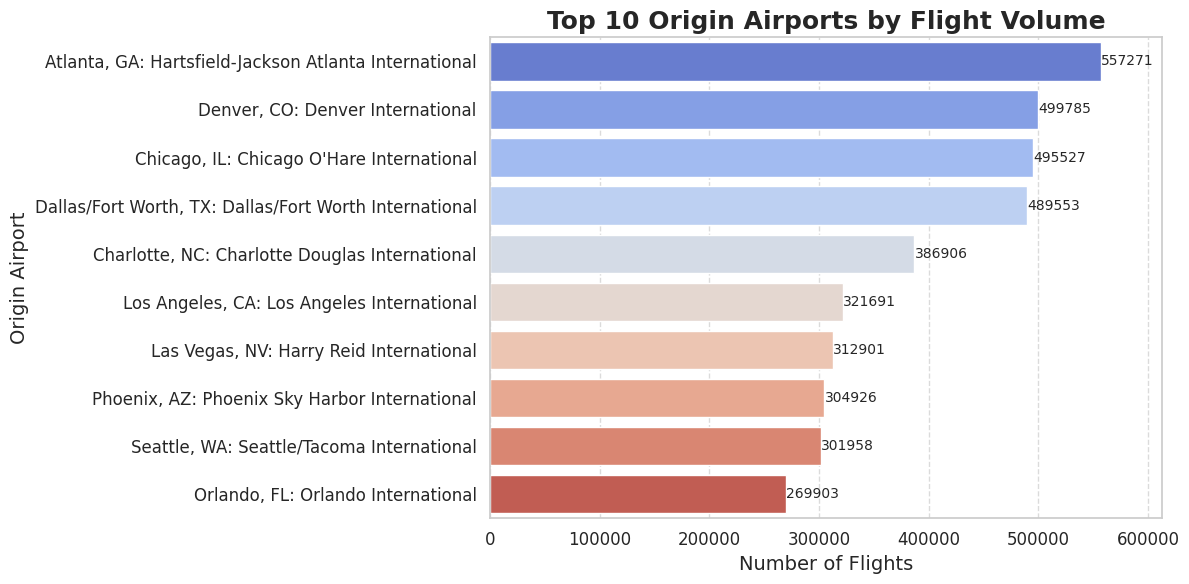

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the DataFrame with airport codes to get full airport names
origin_airports = df.merge(airport_codes, left_on='Origin', right_on='Code', how='left')

# Count the number of flights per origin airport
origin_counts = origin_airports['Description'].value_counts().head(10)  # Get top 10

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=origin_counts.values, y=origin_counts.index, palette="coolwarm")

# Titles and labels
plt.title('Top 10 Origin Airports by Flight Volume', fontsize=18, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=14)
plt.ylabel('Origin Airport', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding counts on the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 200, bar.get_y() + bar.get_height() / 2,  # Adjust x-position for better visibility
             int(bar.get_width()), ha='left', va='center', fontsize=10)

# Adding a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set limits for x-axis
plt.xlim(0, origin_counts.max() * 1.1)  # Slightly higher than the max value for better spacing

# Display the plot with tight layout
plt.tight_layout()
plt.show()

del origin_airports
del origin_counts

Atlanta's Hartsfield-Jackson International Airport is the busiest airport in the U.S., handling significantly more flights than any other airport.
Denver International Airport and Chicago O'Hare International Airport are the second and third busiest airports, respectively, with similar flight volumes.


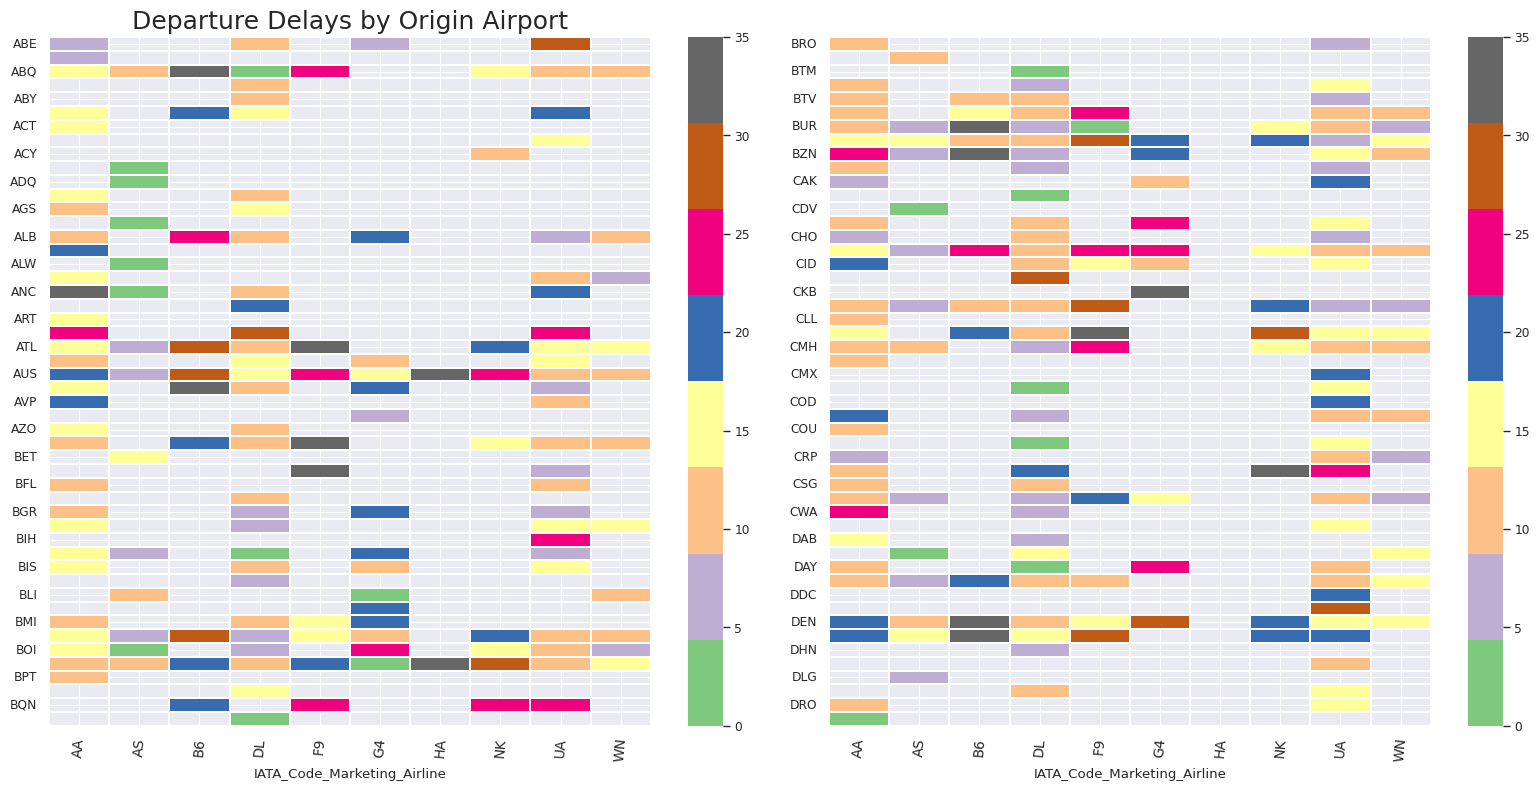

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for the plot
sns.set(context="paper")

# Calculate mean delays for departure
departure_mean_delays = df.groupby(['Origin', 'IATA_Code_Marketing_Airline'])['DepDelay'].mean().unstack()

# Create the figure and subplots for departure delays
fig = plt.figure(1, figsize=(16, 8))

# First subplot for the first 50 airports
ax = fig.add_subplot(1, 2, 1)
subset_dep = departure_mean_delays.iloc[:50, :]
mask_dep = subset_dep.isnull()
sns.heatmap(subset_dep, linewidths=0.01, cmap="Accent", mask=mask_dep, vmin=0, vmax=35)
plt.title("Departure Delays by Origin Airport", fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

# Second subplot for the next 50 airports
ax = fig.add_subplot(1, 2, 2)
subset_dep = departure_mean_delays.iloc[50:100, :]
mask_dep = subset_dep.isnull()
sns.heatmap(subset_dep, linewidths=0.01, cmap="Accent", mask=mask_dep, vmin=0, vmax=35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()


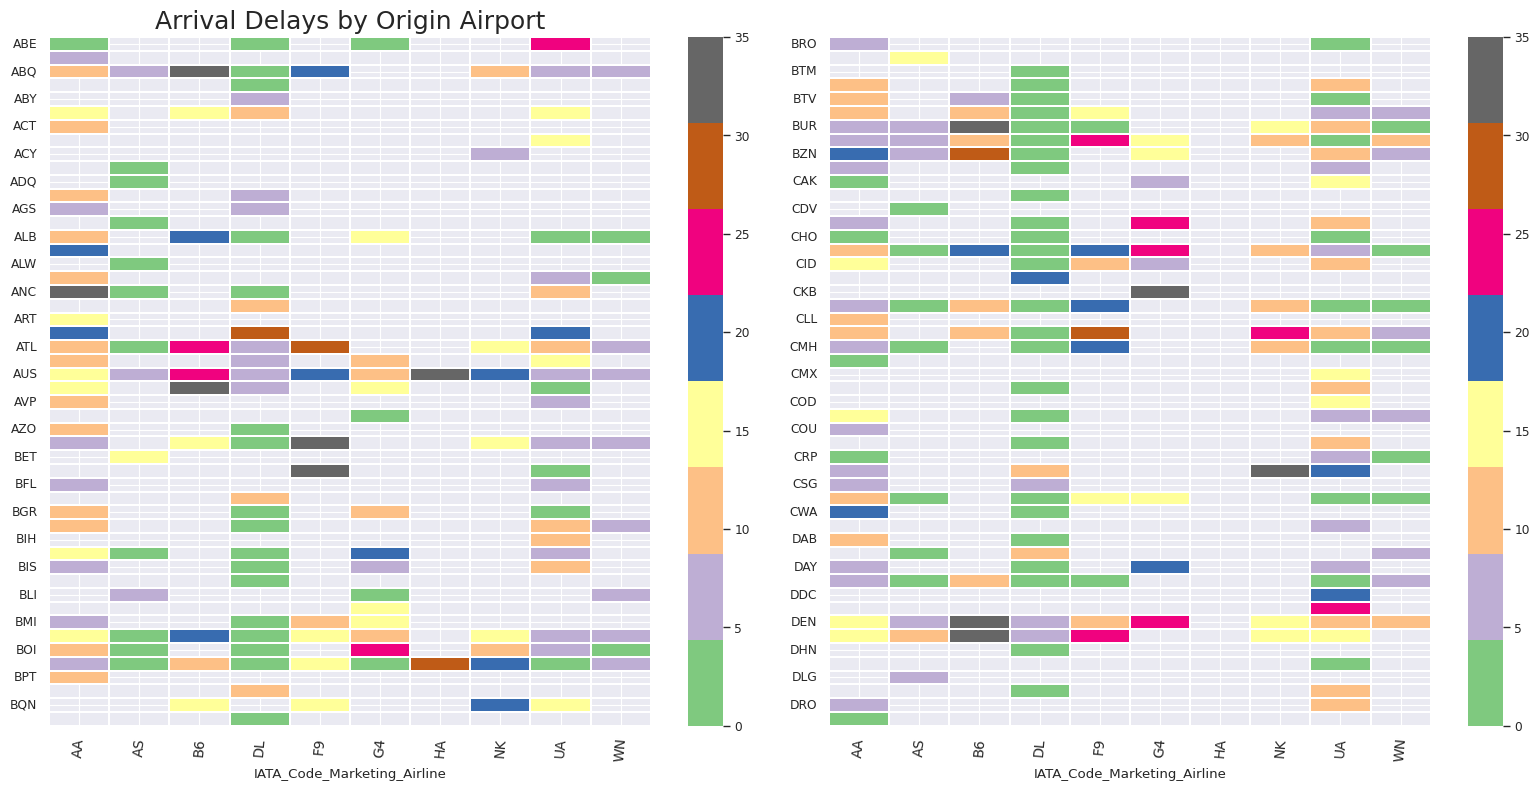

In [56]:
# Calculate mean delays for arrival
arrival_mean_delays = df.groupby(['Origin', 'IATA_Code_Marketing_Airline'])['ArrDelay'].mean().unstack()

# Create the figure and subplots for arrival delays
fig = plt.figure(2, figsize=(16, 8))

# First subplot for the first 50 airports
ax = fig.add_subplot(1, 2, 1)
subset_arr = arrival_mean_delays.iloc[:50, :]
mask_arr = subset_arr.isnull()
sns.heatmap(subset_arr, linewidths=0.01, cmap="Accent", mask=mask_arr, vmin=0, vmax=35)
plt.title("Arrival Delays by Origin Airport", fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

# Second subplot for the next 50 airports
ax = fig.add_subplot(1, 2, 2)
subset_arr = arrival_mean_delays.iloc[50:100, :]
mask_arr = subset_arr.isnull()
sns.heatmap(subset_arr, linewidths=0.01, cmap="Accent", mask=mask_arr, vmin=0, vmax=35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()


### Insights on Delay Variability Across Airports and Airline-Specific Patterns

**Delay Variability Across Airports:** The color patterns indicate that some airports experience more frequent or severe delays, while others have mostly minimal or moderate delays. Airports such as ATL (Atlanta) and DEN (Denver) display a diverse range of delay levels across different airlines, suggesting that these busy hubs may encounter higher variability in departure times due to factors like traffic volume or operational challenges.

**Airline-Specific Patterns:** Certain airlines demonstrate consistent delay patterns across multiple airports. For example, some airlines (e.g., American Airlines [AA], Delta Air Lines [DL]) show a higher occurrence of significant departure delays (darker colors), while arrival delays remain relatively lower, indicating an ability to make up time en route. On the other hand, airlines like Alaska Airlines (AS) show lighter colors across various locations, which suggests generally shorter delays and possibly better adherence to schedules at these airports.


# Hypothesis Testing

#### Anova Test : To determine if there are significant differences in average flight delays among different airlines 

In [27]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame containing the flight data
# Group data by airline and create a list of arrival delays for each airline
airline_groups = df.groupby('IATA_Code_Marketing_Airline')['ArrDelay'].apply(list)

# Perform ANOVA test and get the F-statistic
f_statistic, _ = stats.f_oneway(*airline_groups)

# Calculate degrees of freedom
k = len(airline_groups)  # number of groups
n = sum(len(group) for group in airline_groups)  # total observations
df_between = k - 1  # degrees of freedom between groups
df_within = n - k  # degrees of freedom within groups

# Critical F-value
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"Critical F-value at α = {alpha}: {critical_value}")

# Compare F-statistic with critical value
if f_statistic > critical_value:
    print("Reject the null hypothesis: There is a significant difference in flight delays between airliness.")
else:
    print("Fail to reject the null hypothesis: No significant difference in flight delays between airlines.")

F-statistic: 5621.663856669736
Critical F-value at α = 0.05: 1.8798871715395655
Reject the null hypothesis: There is a significant difference in flight delays between airliness.


#### Anova Test To determine if there are significant differences in average departure delays among different days of the week.

In [29]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame containing the flight data
# Group data by day of the week and create a list of departure delays for each day
day_groups = df.groupby('DayOfWeek')['DepDelay'].apply(list)

# Perform ANOVA test and get the F-statistic
f_statistic, _ = stats.f_oneway(*day_groups)

# Calculate degrees of freedom
k = len(day_groups)  # number of groups (days)
n = sum(len(group) for group in day_groups)  # total observations
df_between = k - 1  # degrees of freedom between groups
df_within = n - k  # degrees of freedom within groups

# Critical F-value
alpha = 0.05
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"Critical F-value at α = {alpha}: {critical_value}")

# Compare F-statistic with critical value
if f_statistic > critical_value:
    print("Reject H0: There is a significant difference in average departure delays by day of the week.")
else:
    print("Fail to reject H0: No significant difference in average departure delays by day of the week.")

F-statistic: 1230.9540271367628
Critical F-value at α = 0.05: 2.0985986196757396
Reject H0: There is a significant difference in average departure delays by day of the week.


#### Pearson's Correlation Coefficient Test :  To determine if there is a significant relationship between departure delays and arrival delays.

In [37]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming df is your DataFrame containing 'DepDelay' and 'ArrDelay'
departure_delays = df['DepDelay']
arrival_delays = df['ArrDelay']

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(departure_delays, arrival_delays)

# Output the results
print(f'Correlation Coefficient: {correlation_coefficient}')
# Conclusion based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between departure delays and arrival delays.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between departure delays and arrival delays.")


Correlation Coefficient: 0.971978184585568
Reject the null hypothesis: There is a significant relationship between departure delays and arrival delays.


#### T-test To determine if there are significant differences in flight delays between weekend and weekday flights.

In [40]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame containing flight data

# Step 1: Filter data for weekend and weekday flights
weekend_flights = df[df['DayOfWeek'].isin([6, 7])]
weekday_flights = df[df['DayOfWeek'].isin([1, 2, 3, 4, 5])]

# Step 2: Calculate average delays
avg_weekend_delay = weekend_flights['ArrDelay'].mean()
avg_weekday_delay = weekday_flights['ArrDelay'].mean()

# Step 3: Perform the independent samples t-test
t_stat, p_value = stats.ttest_ind(weekend_flights['ArrDelay'], weekday_flights['ArrDelay'], equal_var=False)

# Step 4: Set significance level
alpha = 0.05

# Step 5: Print results
print(f"Average Weekend Delay: {avg_weekend_delay}")
print(f"Average Weekday Delay: {avg_weekday_delay}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Step 6: Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in flight delays between weekend and weekday flights.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in flight delays between weekend and weekday flights.")


Average Weekend Delay: 8.763175079113067
Average Weekday Delay: 7.561184154991433
T-statistic: 30.543186148558775, P-value: 7.235552336796101e-205
Reject the null hypothesis: There is a significant difference in flight delays between weekend and weekday flights.


#### T test: To examine if there’s a significant difference in average taxi-out times between large and small airports.

In [49]:
import pandas as pd
import scipy.stats as stats

# Assuming `df` contains our main flight data with a `TaxiOut` column and `Origin` for airport codes.
# Step 1: Calculate the number of flights per airport
airport_counts = df['Origin'].value_counts()

# Step 2: Divide airports into large and small based on median flight count
median_flight_count = airport_counts.median()
large_airports = airport_counts[airport_counts > median_flight_count].index
small_airports = airport_counts[airport_counts <= median_flight_count].index

# Step 3: Filter taxi-out times for large and small airports
large_airport_taxi_out = df[df['Origin'].isin(large_airports)]['TaxiOut'].dropna()
small_airport_taxi_out = df[df['Origin'].isin(small_airports)]['TaxiOut'].dropna()

# Step 4: Perform an independent t-test
t_stat, p_value = stats.ttest_ind(large_airport_taxi_out, small_airport_taxi_out)

# Output test statistics
print(f"T-statistic: {t_stat}")

# Interpretation based on alpha = 0.05
if p_value > 0.05:
    print("Fail to reject the null hypothesis: There is no significant difference in taxi-out time between large and small airports.")
else:
    print("Reject the null hypothesis: There is a significant difference in taxi-out time between large and small airports.")


T-statistic: 99.11735122125123
Reject the null hypothesis: There is a significant difference in taxi-out time between large and small airports.


In [50]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming `df` contains our flight data and `IATA_Code_Marketing_Airline` represents airlines
# and `ArrDelay` is the column representing arrival delays.

# Group the delays by airline
airline_groups = df.groupby('IATA_Code_Marketing_Airline')['ArrDelay'].apply(list)

# Initialize a dictionary to store F-values
f_values = {}

# Perform ANOVA test and calculate F-value for each airline
for airline, delays in airline_groups.items():
    # Compare this airline’s delays against all others
    other_delays = df.loc[df['IATA_Code_Marketing_Airline'] != airline, 'ArrDelay']
    f_stat, p_value = f_oneway(delays, other_delays)
    f_values[airline] = f_stat  # Store the F-statistic for each airline

# Print F-values for each airline
for airline, f_stat in f_values.items():
    print(f"Airline {airline}: F-value = {f_stat:.2f}")


Airline AA: F-value = 8214.54
Airline AS: F-value = 2858.12
Airline B6: F-value = 10301.77
Airline DL: F-value = 19294.84
Airline F9: F-value = 9815.38
Airline G4: F-value = 1340.47
Airline HA: F-value = 1.26
Airline NK: F-value = 3982.67
Airline UA: F-value = 231.59
Airline WN: F-value = 1642.28


#### Anova Test: To determine if there is a significant difference in average flight delays for Airline HA compared to other airlines.

In [51]:
import pandas as pd
from scipy.stats import f_oneway

# Assume df is your DataFrame with the relevant data.
# Separate delays for Airline HA and all others
ha_delays = df[df['IATA_Code_Marketing_Airline'] == 'HA']['ArrDelay']
other_delays = df[df['IATA_Code_Marketing_Airline'] != 'HA']['ArrDelay']

# Perform the ANOVA test
f_stat, p_value = f_oneway(ha_delays, other_delays)

# Print results
print(f"Airline HA: F-statistic = {f_stat:.2f}, P-value = {p_value:.2e}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in flight delays for Airline HA.")
else:
    print("Fail to reject the null hypothesis: No significant difference in flight delays for Airline HA.")

Airline HA: F-statistic = 1.26, P-value = 2.62e-01
Fail to reject the null hypothesis: No significant difference in flight delays for Airline HA.


#### Chi-Square Test: To determine if there is a significant association between the origin of flights and their delay status (On-Time vs. Delayed).

In [53]:
import pandas as pd
import scipy.stats as stats

# Create a new delay status variable without modifying the original DataFrame
delay_status = ['On-Time' if x <= 0 else 'Delayed' for x in df['ArrDelay']]

# Create a contingency table
contingency_table = pd.crosstab(df['Origin'], delay_status)

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2}")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between flight origin and delay status.")
else:
    print("Fail to reject the null hypothesis: No significant association between flight origin and delay status.")

Chi-Square Statistic: 121202.6964589365
Reject the null hypothesis: There is a significant association between flight origin and delay status.


# Model Training

In [17]:
# Selecting the specified columns for X
X = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline',
        'Origin', 'Dest', 'DepDelay', 'TaxiOut', 'TaxiIn', 'Diverted', 'CRSElapsedTime',
        'ActualElapsedTime', 'AirTime', 'Distance', 'CarrierDelay', 'WeatherDelay',
        'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

# Storing 'ArrDelay' in y
y = df['ArrDelay']

In [34]:
# # Selecting the specified columns for X
# X = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline',
#         'Origin', 'Dest', 'TaxiOut', 'TaxiIn', 'Diverted', 'CRSElapsedTime',
#         'ActualElapsedTime', 'AirTime', 'Distance']]

# # Storing 'ArrDelay' in y
# y = df['ArrDelay']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12089512 entries, 0 to 12301233
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         int64  
 1   Month                        int64  
 2   DayofMonth                   int64  
 3   DayOfWeek                    int64  
 4   IATA_Code_Marketing_Airline  object 
 5   Origin                       object 
 6   Dest                         object 
 7   DepDelay                     float64
 8   TaxiOut                      float64
 9   TaxiIn                       float64
 10  Diverted                     float64
 11  CRSElapsedTime               float64
 12  ActualElapsedTime            float64
 13  AirTime                      float64
 14  Distance                     float64
 15  CarrierDelay                 float64
 16  WeatherDelay                 float64
 17  NASDelay                     float64
 18  SecurityDelay                float64
 19  Lat

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each of the specified columns
X['IATA_Code_Marketing_Airline'] = label_encoder.fit_transform(X['IATA_Code_Marketing_Airline'])
X['Origin'] = label_encoder.fit_transform(X['Origin'])
X['Dest'] = label_encoder.fit_transform(X['Dest'])

# Display the transformed DataFrame
print(X.head())

/tmp/ipykernel_30/642180036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IATA_Code_Marketing_Airline'] = label_encoder.fit_transform(X['IATA_Code_Marketing_Airline'])
/tmp/ipykernel_30/642180036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = label_encoder.fit_transform(X['Origin'])


   Year  Month  DayofMonth  DayOfWeek  IATA_Code_Marketing_Airline  Origin  \
0  2023     12          30          6                            3     169   
1  2023     12          30          6                            3     197   
2  2023     12           1          5                            3     197   
3  2023     12           3          7                            3     197   
4  2023     12           4          1                            3     197   

   Dest  DepDelay  TaxiOut  TaxiIn  Diverted  CRSElapsedTime  \
0   197      -5.0     10.0     6.0       0.0           124.0   
1   169      -9.0     14.0     7.0       0.0           150.0   
2   326     -10.0     25.0     6.0       0.0           180.0   
3   326      23.0     38.0     8.0       0.0           180.0   
4   326      -7.0     38.0     8.0       0.0           180.0   

   ActualElapsedTime  AirTime  Distance  CarrierDelay  WeatherDelay  NASDelay  \
0              125.0    109.0     660.0           0.0           0

/tmp/ipykernel_30/642180036.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = label_encoder.fit_transform(X['Dest'])


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12089512 entries, 0 to 12301233
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         int64  
 1   Month                        int64  
 2   DayofMonth                   int64  
 3   DayOfWeek                    int64  
 4   IATA_Code_Marketing_Airline  int64  
 5   Origin                       int64  
 6   Dest                         int64  
 7   DepDelay                     float64
 8   TaxiOut                      float64
 9   TaxiIn                       float64
 10  Diverted                     float64
 11  CRSElapsedTime               float64
 12  ActualElapsedTime            float64
 13  AirTime                      float64
 14  Distance                     float64
 15  CarrierDelay                 float64
 16  WeatherDelay                 float64
 17  NASDelay                     float64
 18  SecurityDelay                float64
 19  Lat

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models with default parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor()
}

results = []

# Loop through each model
for model_name, model in models.items():
    print(f"Running {model_name}...")
    
    # Measure training time
    start_training_time = time.time()
    model.fit(X_train_scaled, y_train)  # Using the original scaled features for all models
    end_training_time = time.time()
    
    # Measure evaluation times
    start_training_eval_time = time.time()
    y_train_pred = model.predict(X_train_scaled)  # Predict on scaled training set
    training_accuracy = r2_score(y_train, y_train_pred)
    end_training_eval_time = time.time()
    
    start_testing_time = time.time()
    y_test_pred = model.predict(X_test_scaled)  # Predict on scaled test set
    testing_accuracy = r2_score(y_test, y_test_pred)
    end_testing_time = time.time()
    
    # Calculate runtimes
    training_time = end_training_time - start_training_time
    training_eval_time = end_training_eval_time - start_training_eval_time
    testing_time = end_testing_time - start_testing_time
    
    # Store results
    results.append({
        "Model": model_name,
        "Training R-squared": training_accuracy,
        "Testing R-squared": testing_accuracy,
        "Training Time (seconds)": training_time,
        "Testing Time (seconds)": testing_time
    })

# Display results
for result in results:
    print("\n-----------------------------")
    print(f"Model: {result['Model']}")
    print(f"Training R-squared Accuracy: {result['Training R-squared']:.4f}")
    print(f"Testing R-squared Accuracy: {result['Testing R-squared']:.4f}")
    print(f"Training Time: {result['Training Time (seconds)']:.2f} seconds")
    print(f"Testing Time: {result['Testing Time (seconds)']:.2f} seconds")

Running Linear Regression...
Running Ridge Regression...
Running Lasso Regression...
Running ElasticNet Regression...
Running Decision Tree Regression...
Running XGBoost...
Running LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.552606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3077
[LightGBM] [Info] Number of data points in the train set: 9671609, number of used features: 19
[LightGBM] [Info] Start training from score 7.883473
Running SGD Regressor...
Running Hist Gradient Boosting...

-----------------------------
Model: Linear Regression
Training R-squared Accuracy: 0.9999
Testing R-squared Accuracy: 0.9998
Training Time: 12.00 seconds
Testing Time: 0.09 seconds

-----------------------------
Model: Ridge Regression
Training R-squared Accuracy: 0.9999
Testing R-squared Accuracy: 0.9998
Training Time: 1.63 seconds
Tes

In [ ]:
# on Hold
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors can be adjusted

print("Running KNN Regressor...")

# Measure training time
start_training_time = time.time()
knn_model.fit(X_train_scaled, y_train)
end_training_time = time.time()

# Measure evaluation times
start_training_eval_time = time.time()
y_train_pred = knn_model.predict(X_train_scaled)  # Predict on scaled training set
training_accuracy = r2_score(y_train, y_train_pred)
end_training_eval_time = time.time()

start_testing_time = time.time()
y_test_pred = knn_model.predict(X_test_scaled)  # Predict on scaled test set
testing_accuracy = r2_score(y_test, y_test_pred)
end_testing_time = time.time()

# Calculate runtimes
training_time = end_training_time - start_training_time
training_eval_time = end_training_eval_time - start_training_eval_time
testing_time = end_testing_time - start_testing_time

# Display results
print("\n-----------------------------")
print(f"Model: KNN Regressor")
print(f"Training R-squared Accuracy: {training_accuracy:.4f}")
print(f"Testing R-squared Accuracy: {testing_accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

## With random projection

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with Random Projection
n_components = 10  # Number of components to keep after random projection
random_projection = GaussianRandomProjection(n_components=n_components, random_state=42)
X_train_reduced = random_projection.fit_transform(X_train_scaled)
X_test_reduced = random_projection.transform(X_test_scaled)

# Dictionary to store models with default parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor()
}

results = []

# Loop through each model
for model_name, model in models.items():
    print(f"Running {model_name}...")
    
    # Measure training time
    start_training_time = time.time()
    model.fit(X_train_reduced, y_train)  # Using reduced dimensions for all models
    end_training_time = time.time()
    
    # Measure evaluation times
    start_training_eval_time = time.time()
    y_train_pred = model.predict(X_train_reduced)  # Predict on reduced training set
    training_accuracy = r2_score(y_train, y_train_pred)
    end_training_eval_time = time.time()
    
    start_testing_time = time.time()
    y_test_pred = model.predict(X_test_reduced)  # Predict on reduced test set
    testing_accuracy = r2_score(y_test, y_test_pred)
    end_testing_time = time.time()
    
    # Calculate runtimes
    training_time = end_training_time - start_training_time
    training_eval_time = end_training_eval_time - start_training_eval_time
    testing_time = end_testing_time - start_testing_time
    
    # Store results
    results.append({
        "Model": model_name,
        "Training R-squared": training_accuracy,
        "Testing R-squared": testing_accuracy,
        "Training Time (seconds)": training_time,
        "Testing Time (seconds)": testing_time
    })

# Display results
for result in results:
    print("\n-----------------------------")
    print(f"Model: {result['Model']}")
    print(f"Training R-squared Accuracy: {result['Training R-squared']:.4f}")
    print(f"Testing R-squared Accuracy: {result['Testing R-squared']:.4f}")
    print(f"Training Time: {result['Training Time (seconds)']:.2f} seconds")
    print(f"Testing Time: {result['Testing Time (seconds)']:.2f} seconds")

Running Linear Regression...
Running Ridge Regression...
Running Lasso Regression...
Running ElasticNet Regression...
Running Decision Tree Regression...
Running XGBoost...
Running LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.899027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9671609, number of used features: 10
[LightGBM] [Info] Start training from score 7.883473
Running SGD Regressor...
Running Hist Gradient Boosting...

-----------------------------
Model: Linear Regression
Training R-squared Accuracy: 0.8228
Testing R-squared Accuracy: 0.8229
Training Time: 6.58 seconds
Testing Time: 0.07 seconds

-----------------------------
Model: Ridge Regression
Training R-squared Accuracy: 0.8228
Testing R-squared Accuracy: 0.8229
Training Time: 1.39 seconds
Testing Time: 0.08 seconds

-----------------------------
Model: Las

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with Random Projection
n_components = 5  # Number of components to keep after random projection
random_projection = GaussianRandomProjection(n_components=n_components, random_state=42)
X_train_reduced = random_projection.fit_transform(X_train_scaled)
X_test_reduced = random_projection.transform(X_test_scaled)

# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors can be adjusted

print("Running KNN Regressor with Random Projection...")

# Measure training time
start_training_time = time.time()
knn_model.fit(X_train_reduced, y_train)
end_training_time = time.time()

# Measure evaluation times
start_training_eval_time = time.time()
y_train_pred = knn_model.predict(X_train_reduced)  # Predict on reduced training set
training_accuracy = r2_score(y_train, y_train_pred)
end_training_eval_time = time.time()

start_testing_time = time.time()
y_test_pred = knn_model.predict(X_test_reduced)  # Predict on reduced test set
testing_accuracy = r2_score(y_test, y_test_pred)
end_testing_time = time.time()

# Calculate runtimes
training_time = end_training_time - start_training_time
training_eval_time = end_training_eval_time - start_training_eval_time
testing_time = end_testing_time - start_testing_time

# Display results
print("\n-----------------------------")
print(f"Model: KNN Regressor with Random Projection")
print(f"Training R-squared Accuracy: {training_accuracy:.4f}")
print(f"Testing R-squared Accuracy: {testing_accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Running KNN Regressor with Random Projection...

-----------------------------
Model: KNN Regressor with Random Projection
Training R-squared Accuracy: 0.9155
Testing R-squared Accuracy: 0.8724
Training Time: 30.54 seconds
Testing Time: 160.26 seconds


## with pca

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with PCA
n_components = 10  # Number of components to keep after PCA
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Dictionary to store models with default parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor()
}

results = []

# Loop through each model
for model_name, model in models.items():
    print(f"Running {model_name}...")
    
    # Measure training time
    start_training_time = time.time()
    model.fit(X_train_reduced, y_train)  # Using reduced dimensions for all models
    end_training_time = time.time()
    
    # Measure evaluation times
    start_training_eval_time = time.time()
    y_train_pred = model.predict(X_train_reduced)  # Predict on reduced training set
    training_accuracy = r2_score(y_train, y_train_pred)
    end_training_eval_time = time.time()
    
    start_testing_time = time.time()
    y_test_pred = model.predict(X_test_reduced)  # Predict on reduced test set
    testing_accuracy = r2_score(y_test, y_test_pred)
    end_testing_time = time.time()
    
    # Calculate runtimes
    training_time = end_training_time - start_training_time
    training_eval_time = end_training_eval_time - start_training_eval_time
    testing_time = end_testing_time - start_testing_time
    
    # Store results
    results.append({
        "Model": model_name,
        "Training R-squared": training_accuracy,
        "Testing R-squared": testing_accuracy,
        "Training Time (seconds)": training_time,
        "Testing Time (seconds)": testing_time
    })

# Display results
for result in results:
    print("\n-----------------------------")
    print(f"Model: {result['Model']}")
    print(f"Training R-squared Accuracy: {result['Training R-squared']:.4f}")
    print(f"Testing R-squared Accuracy: {result['Testing R-squared']:.4f}")
    print(f"Training Time: {result['Training Time (seconds)']:.2f} seconds")
    print(f"Testing Time: {result['Testing Time (seconds)']:.2f} seconds")


Running Linear Regression...
Running Ridge Regression...
Running Lasso Regression...
Running ElasticNet Regression...
Running Decision Tree Regression...
Running XGBoost...
Running LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.981894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9671609, number of used features: 10
[LightGBM] [Info] Start training from score 7.883473
Running SGD Regressor...
Running Hist Gradient Boosting...

-----------------------------
Model: Linear Regression
Training R-squared Accuracy: 0.9769
Testing R-squared Accuracy: 0.9770
Training Time: 7.15 seconds
Testing Time: 0.07 seconds

-----------------------------
Model: Ridge Regression
Training R-squared Accuracy: 0.9769
Testing R-squared Accuracy: 0.9770
Training Time: 1.53 seconds
Testing Time: 0.10 seconds

-----------------------------
Model: Las

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with PCA
n_components = 5  # Number of components to keep after PCA
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors can be adjusted

print("Running KNN Regressor with PCA...")

# Measure training time
start_training_time = time.time()
knn_model.fit(X_train_reduced, y_train)
end_training_time = time.time()

# Measure evaluation times
start_training_eval_time = time.time()
y_train_pred = knn_model.predict(X_train_reduced)  # Predict on reduced training set
training_accuracy = r2_score(y_train, y_train_pred)
end_training_eval_time = time.time()

start_testing_time = time.time()
y_test_pred = knn_model.predict(X_test_reduced)  # Predict on reduced test set
testing_accuracy = r2_score(y_test, y_test_pred)
end_testing_time = time.time()

# Calculate runtimes
training_time = end_training_time - start_training_time
training_eval_time = end_training_eval_time - start_training_eval_time
testing_time = end_testing_time - start_testing_time

# Display results
print("\n-----------------------------")
print(f"Model: KNN Regressor with PCA")
print(f"Training R-squared Accuracy: {training_accuracy:.4f}")
print(f"Testing R-squared Accuracy: {testing_accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Running KNN Regressor with PCA...

-----------------------------
Model: KNN Regressor with PCA
Training R-squared Accuracy: 0.9844
Testing R-squared Accuracy: 0.9762
Training Time: 30.49 seconds
Testing Time: 146.28 seconds


# with sampling + pca

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import time

# Parameters for quantile-based sampling
sampling_fraction = 0.1  # Use 10% of the dataset
n_bins = 10  # Number of bins for quantile-based grouping

# Create quantile bins for `y`
y_bins = pd.qcut(y, q=n_bins, labels=False, duplicates='drop')

# Sample from each bin proportionally
sampled_indices = []
for bin_value in np.unique(y_bins):
    bin_indices = np.where(y_bins == bin_value)[0]
    sampled_indices.extend(np.random.choice(bin_indices, int(len(bin_indices) * sampling_fraction), replace=False))

# Create the sampled dataset using .iloc to select rows by index
X_sample = X.iloc[sampled_indices]
y_sample = y.iloc[sampled_indices]

# Splitting the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with PCA
n_components = 10  # Number of components to keep after PCA
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Dictionary to store models with default parameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Hist Gradient Boosting": HistGradientBoostingRegressor()
}

results = []

# Loop through each model
for model_name, model in models.items():
    print(f"Running {model_name}...")
    
    # Measure training time
    start_training_time = time.time()
    model.fit(X_train_reduced, y_train)  # Using reduced dimensions for all models
    end_training_time = time.time()
    
    # Measure evaluation times
    start_training_eval_time = time.time()
    y_train_pred = model.predict(X_train_reduced)  # Predict on reduced training set
    training_accuracy = r2_score(y_train, y_train_pred)
    end_training_eval_time = time.time()
    
    start_testing_time = time.time()
    y_test_pred = model.predict(X_test_reduced)  # Predict on reduced test set
    testing_accuracy = r2_score(y_test, y_test_pred)
    end_testing_time = time.time()
    
    # Calculate runtimes
    training_time = end_training_time - start_training_time
    training_eval_time = end_training_eval_time - start_training_eval_time
    testing_time = end_testing_time - start_testing_time
    
    # Store results
    results.append({
        "Model": model_name,
        "Training R-squared": training_accuracy,
        "Testing R-squared": testing_accuracy,
        "Training Time (seconds)": training_time,
        "Testing Time (seconds)": testing_time
    })

# Display results
for result in results:
    print("\n-----------------------------")
    print(f"Model: {result['Model']}")
    print(f"Training R-squared Accuracy: {result['Training R-squared']:.4f}")
    print(f"Testing R-squared Accuracy: {result['Testing R-squared']:.4f}")
    print(f"Training Time: {result['Training Time (seconds)']:.2f} seconds")
    print(f"Testing Time: {result['Testing Time (seconds)']:.2f} seconds")

Running Linear Regression...
Running Ridge Regression...
Running Lasso Regression...
Running ElasticNet Regression...
Running Decision Tree Regression...
Running XGBoost...
Running LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 967156, number of used features: 10
[LightGBM] [Info] Start training from score 7.866453
Running SGD Regressor...
Running Hist Gradient Boosting...

-----------------------------
Model: Linear Regression
Training R-squared Accuracy: 0.9768
Testing R-squared Accuracy: 0.9760
Training Time: 0.46 seconds
Testing Time: 0.01 seconds

-----------------------------
Model: Ridge Regression
Training R-squared Accuracy: 0.9768
Testing R-squared Accuracy: 0.9760
Training Time: 0.19 seconds
Testing Time: 0.01 seconds

-----------------------------
Model: Lass

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# Parameters for quantile-based sampling
sampling_fraction = 0.1  # Use 10% of the dataset
n_bins = 10  # Number of bins for quantile-based grouping

# Create quantile bins for `y`
y_bins = pd.qcut(y, q=n_bins, labels=False, duplicates='drop')

# Sample from each bin proportionally
sampled_indices = []
for bin_value in np.unique(y_bins):
    bin_indices = np.where(y_bins == bin_value)[0]
    sampled_indices.extend(np.random.choice(bin_indices, int(len(bin_indices) * sampling_fraction), replace=False))

# Create the sampled dataset using .iloc to select rows by index
X_sample = X.iloc[sampled_indices]
y_sample = y.iloc[sampled_indices]

# Splitting the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality reduction with PCA
n_components = 5  # Number of components to keep after PCA
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# KNN Regressor Model
knn = KNeighborsRegressor(n_neighbors=5)

# Measure training time
start_training_time = time.time()
knn.fit(X_train_reduced, y_train)  # Using reduced dimensions
end_training_time = time.time()

# Measure evaluation times
start_training_eval_time = time.time()
y_train_pred = knn.predict(X_train_reduced)  # Predict on reduced training set
training_accuracy = r2_score(y_train, y_train_pred)
end_training_eval_time = time.time()

start_testing_time = time.time()
y_test_pred = knn.predict(X_test_reduced)  # Predict on reduced test set
testing_accuracy = r2_score(y_test, y_test_pred)
end_testing_time = time.time()

# Calculate runtimes
training_time = end_training_time - start_training_time
training_eval_time = end_training_eval_time - start_training_eval_time
testing_time = end_testing_time - start_testing_time

# Display results
print(f"Model: KNN Regressor")
print(f"Training R-squared Accuracy: {training_accuracy:.4f}")
print(f"Testing R-squared Accuracy: {testing_accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Model: KNN Regressor
Training R-squared Accuracy: 0.9822
Testing R-squared Accuracy: 0.9729
Training Time: 2.06 seconds
Testing Time: 13.04 seconds


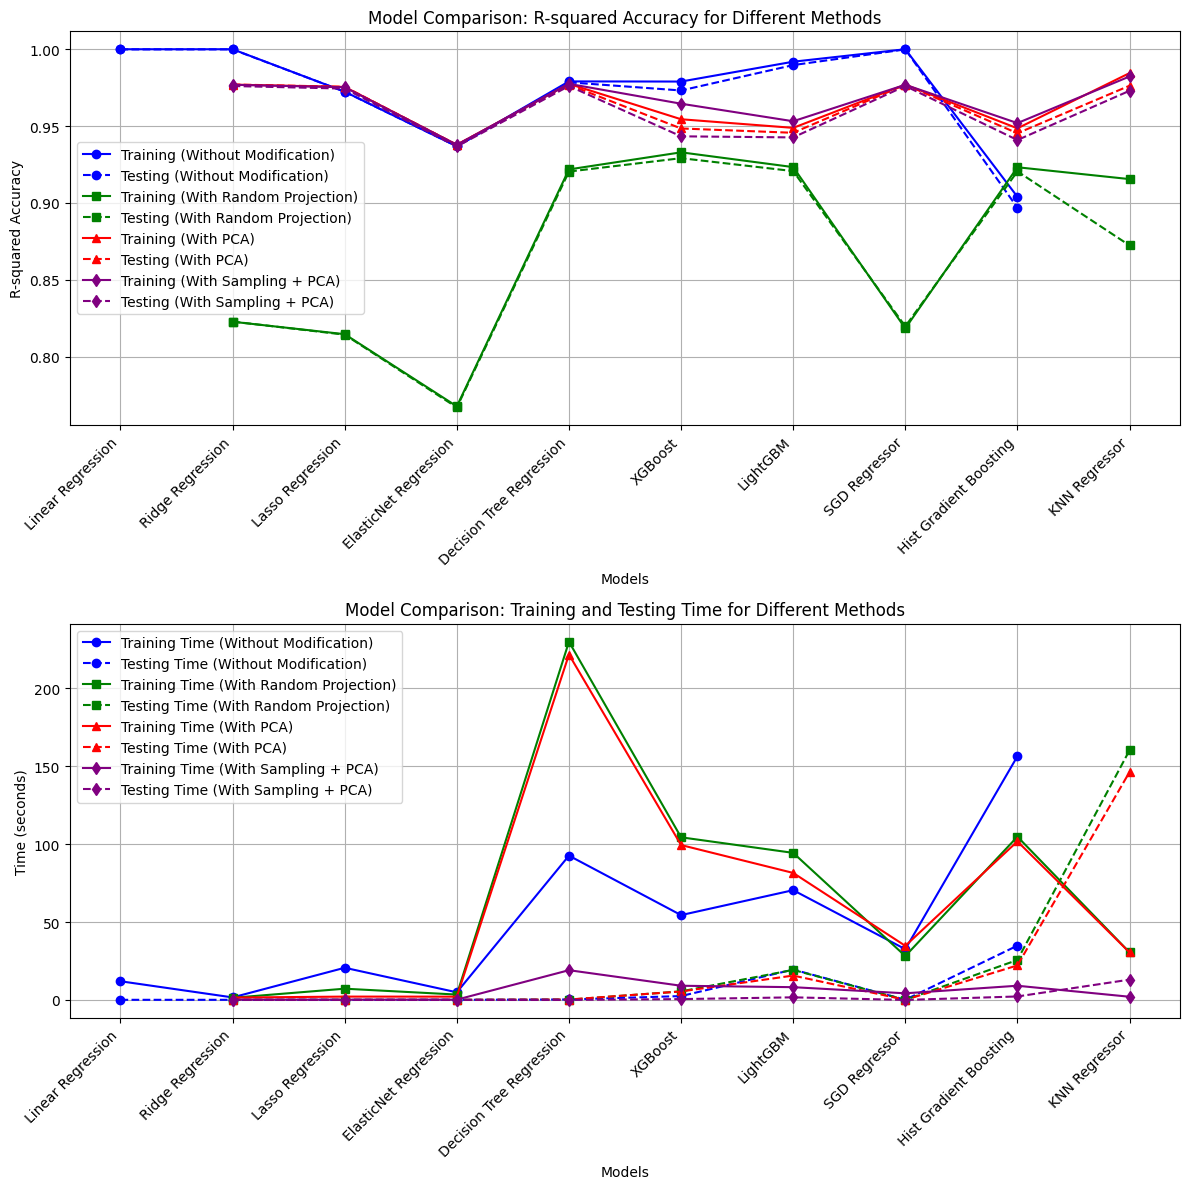

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and R-squared accuracies for different methods
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression", 
    "ElasticNet Regression", "Decision Tree Regression", "XGBoost", 
    "LightGBM", "SGD Regressor", "Hist Gradient Boosting", 
    "KNN Regressor"  # Added KNN for others but not "Without Modification"
]

# R-squared values and training/testing times
# Without Modification
train_r2_without_mod = [0.9999, 0.9999, 0.9723, 0.9368, 0.9790, 0.9789, 0.9918, 0.9999, 0.9040]
test_r2_without_mod = [0.9998, 0.9998, 0.9723, 0.9368, 0.9784, 0.9731, 0.9896, 0.9998, 0.8969]
train_time_without_mod = [12.00, 1.63, 20.66, 4.90, 92.62, 54.45, 70.46, 32.58, 156.40]
test_time_without_mod = [0.09, 0.09, 0.09, 0.09, 0.30, 2.49, 19.50, 0.13, 34.87]

# With Random Projection
train_r2_random_proj = [0.8228, 0.8228, 0.8147, 0.7678, 0.9218, 0.9329, 0.9233, 0.8185, 0.9232, 0.9155]
test_r2_random_proj = [0.8229, 0.8229, 0.8144, 0.7671, 0.9204, 0.9291, 0.9207, 0.8198, 0.9205, 0.8724]
train_time_random_proj = [6.58, 1.39, 7.22, 3.46, 229.90, 104.39, 94.40, 28.17, 104.79, 30.54]
test_time_random_proj = [0.07, 0.08, 0.07, 0.07, 0.19, 5.51, 19.28, 0.07, 25.65, 160.26]

# With PCA
train_r2_pca = [0.9769, 0.9769, 0.9754, 0.9378, 0.9774, 0.9544, 0.9488, 0.9769, 0.9485, 0.9844]
test_r2_pca = [0.9770, 0.9770, 0.9755, 0.9378, 0.9768, 0.9484, 0.9456, 0.9769, 0.9453, 0.9762]
train_time_pca = [7.15, 1.53, 2.15, 2.12, 221.70, 99.42, 81.52, 34.73, 101.78, 30.49]
test_time_pca = [0.07, 0.10, 0.07, 0.07, 0.27, 5.45, 15.65, 0.08, 22.17, 146.28]

# With Sampling + PCA
train_r2_sampling_pca = [0.9768, 0.9768, 0.9752, 0.9378, 0.9774, 0.9645, 0.9531, 0.9768, 0.9519, 0.9822]
test_r2_sampling_pca = [0.9760, 0.9760, 0.9743, 0.9367, 0.9760, 0.9433, 0.9426, 0.9760, 0.9409, 0.9729]
train_time_sampling_pca = [0.46, 0.19, 0.20, 0.20, 19.10, 9.12, 8.20, 4.27, 9.12, 2.06]
test_time_sampling_pca = [0.01, 0.01, 0.01, 0.01, 0.03, 0.55, 1.68, 0.01, 2.24, 13.04]

# Plotting
x = np.arange(len(models))  # Position for each model

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot R-squared values for training and testing data
ax1.plot(x[:-1], train_r2_without_mod, marker='o', label='Training (Without Modification)', linestyle='-', color='b')
ax1.plot(x[:-1], test_r2_without_mod, marker='o', label='Testing (Without Modification)', linestyle='--', color='b')

ax1.plot(x[1:], train_r2_random_proj[1:], marker='s', label='Training (With Random Projection)', linestyle='-', color='g')
ax1.plot(x[1:], test_r2_random_proj[1:], marker='s', label='Testing (With Random Projection)', linestyle='--', color='g')

ax1.plot(x[1:], train_r2_pca[1:], marker='^', label='Training (With PCA)', linestyle='-', color='r')
ax1.plot(x[1:], test_r2_pca[1:], marker='^', label='Testing (With PCA)', linestyle='--', color='r')

ax1.plot(x[1:], train_r2_sampling_pca[1:], marker='d', label='Training (With Sampling + PCA)', linestyle='-', color='purple')
ax1.plot(x[1:], test_r2_sampling_pca[1:], marker='d', label='Testing (With Sampling + PCA)', linestyle='--', color='purple')

# Setting for R-squared plot
ax1.set_title('Model Comparison: R-squared Accuracy for Different Methods')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared Accuracy')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(loc='best')
ax1.grid(True)

# Plot Training and Testing Time
ax2.plot(x[:-1], train_time_without_mod, marker='o', label='Training Time (Without Modification)', linestyle='-', color='b')
ax2.plot(x[:-1], test_time_without_mod, marker='o', label='Testing Time (Without Modification)', linestyle='--', color='b')

ax2.plot(x[1:], train_time_random_proj[1:], marker='s', label='Training Time (With Random Projection)', linestyle='-', color='g')
ax2.plot(x[1:], test_time_random_proj[1:], marker='s', label='Testing Time (With Random Projection)', linestyle='--', color='g')

ax2.plot(x[1:], train_time_pca[1:], marker='^', label='Training Time (With PCA)', linestyle='-', color='r')
ax2.plot(x[1:], test_time_pca[1:], marker='^', label='Testing Time (With PCA)', linestyle='--', color='r')

ax2.plot(x[1:], train_time_sampling_pca[1:], marker='d', label='Training Time (With Sampling + PCA)', linestyle='-', color='purple')
ax2.plot(x[1:], test_time_sampling_pca[1:], marker='d', label='Testing Time (With Sampling + PCA)', linestyle='--', color='purple')

# Setting for Time plot
ax2.set_title('Model Comparison: Training and Testing Time for Different Methods')
ax2.set_xlabel('Models')
ax2.set_ylabel('Time (seconds)')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend(loc='best')
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# END